In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import mplhep as hep
plt.style.use(hep.style.CMS)
#from plotting_utils import *
import uproot
import awkward as ak

In [2]:
input_folder = "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/genmatching_efficiency_studies/electrons_genmatching"

output_folder = "plots/electrons_gen_matching_v2"
os.makedirs(output_folder, exist_ok=True)

In [ ]:
df_2 = pd.HDFStore(f"{input_folder}/Mustache_126X_mcRun3_2023_v2.hdf5", "r")["df"]
df_2.rename(columns={"output_object.csv":"genpart_index"}, inplace=True)
df_2 = df_2.iloc[:-1]

In [3]:
df_1 = pd.HDFStore(f"{input_folder}/DeepSC_algoA_126X_mcRun3_2023_v2.hdf5", "r")["df"]
df_1.rename(columns={"output_object.csv":"genpart_index"}, inplace=True)
df_1 = df_1.iloc[:-1]

In [3]:
df_1=pd.read_csv('Dchunk_0.csv')
df_2=pd.read_csv('chunk_0.csv')

In [4]:
dfj = df_1.merge(df_2, on=["runId","eventId","genpart_index"], suffixes=["_D", "_M"],indicator=True, how="inner", sort=False)
dfj.to_csv('dfj.csv')

# First steps

In [5]:
list(df_1.columns)

['Unnamed: 0',
 'genpart_index',
 'elematched',
 'phomatched',
 'ele_index',
 'pho_index',
 'ele_index_2nd',
 'pho_index_2nd',
 'deltaR_genPart_ele',
 'deltaR_genPart_pho',
 'deltaR_genPart_ele_second',
 'deltaR_genPart_pho_second',
 'calomatched',
 'caloindex',
 'sc_matched',
 'sc_index',
 'seed_index',
 'en_seed',
 'et_seed',
 'en_seed_calib',
 'et_seed_calib',
 'seed_eta',
 'seed_phi',
 'seed_iz',
 'sc_eta',
 'sc_phi',
 'sc_swissCross',
 'sc_r9',
 'sc_sigmaIetaIeta',
 'sc_sigmaIetaIphi',
 'sc_sigmaIphiIphi',
 'sc_e5x5',
 'sc_swissCross_f5x5',
 'sc_r9_f5x5',
 'sc_sigmaIetaIeta_f5x5',
 'sc_sigmaIetaIphi_f5x5',
 'sc_sigmaIphiIphi_f5x5',
 'sc_e5x5_f5x5',
 'ele_eta',
 'ele_phi',
 'ele_energy',
 'ele_et',
 'ele_ecalEnergy',
 'ele_ecalSCEnergy',
 'ele_scRawEnergy',
 'ele_scRawESEnergy',
 'ele_eta_2nd',
 'ele_phi_2nd',
 'ele_energy_2nd',
 'ele_et_2nd',
 'ele_ecalEnergy_2nd',
 'ele_ecalSCEnergy_2nd',
 'ele_scRawEnergy_2nd',
 'ele_scRawESEnergy_2nd',
 'ele_SCfbrem',
 'ele_tracfbrem',
 'ele_e5

- plot energia, pt, eta, phi della genparticle
- energia , pt, phi, eta del SuperCluster
- 

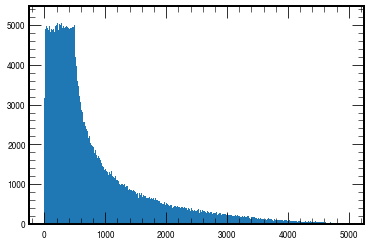

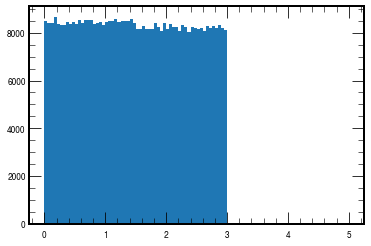

In [6]:
plt.hist(df_1.genpart_en,bins=1000, range=[0,5000])
plt.show()
plt.hist(df_1.genpart_eta,bins=100, range=[0,5])
plt.show()

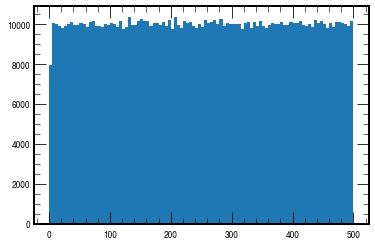

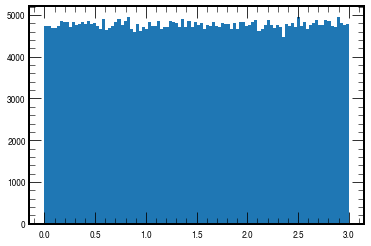

In [7]:
plt.hist(df_1.genpart_pt, bins=100, range=[0, 500])
plt.show()
plt.hist(df_1.genpart_phi,bins=100, range=[0,3])
plt.show()

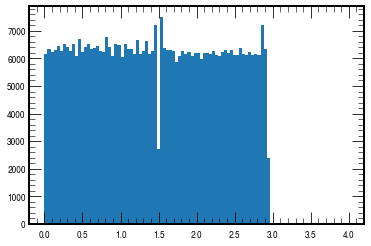

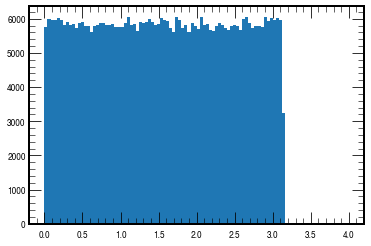

In [15]:
plt.hist(df_1.sc_eta,bins=100, range=[0,4])
plt.show()
plt.hist(df_1.sc_phi,bins=100, range=[0,4])
plt.show()

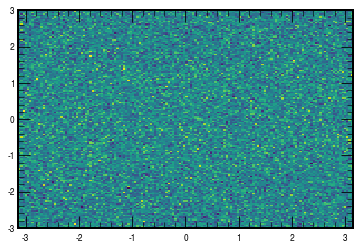

In [8]:
plt.hist2d(df_1.genpart_phi,df_1.genpart_eta,bins=(150, 150), range=((-np.pi,np.pi),(-3,3)))
plt.show()

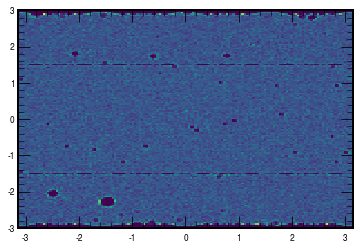

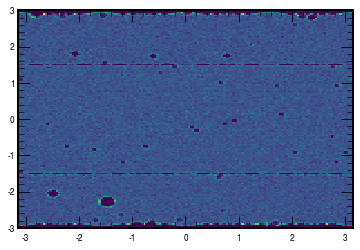

In [9]:
plt.hist2d(df_1.sc_phi,df_1.sc_eta,bins=(150, 150), range=((-np.pi,np.pi),(-3,3)))
plt.show()
plt.hist2d(df_2.sc_phi,df_2.sc_eta,bins=(150, 150), range=((-np.pi,np.pi),(-3,3)))
plt.show()

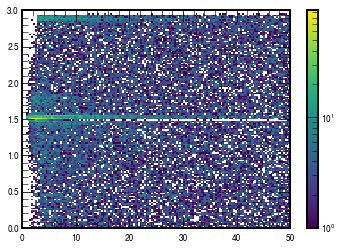

In [10]:
plt.hist2d(df_1.et_seed,df_1.seed_eta,bins=(150, 150), range=((0,50),(0,3)),
          norm=LogNorm())
plt.colorbar()

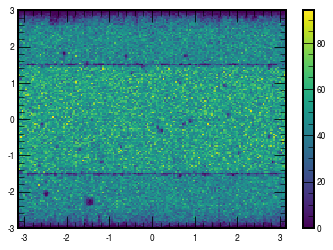

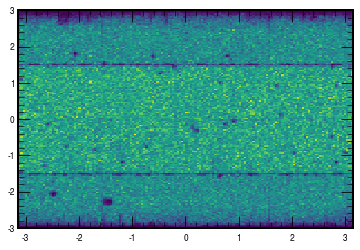

In [11]:
plt.hist2d(df_1.ele_phi,df_1.ele_eta,  bins=(150,150), range=((-np.pi,np.pi),(-3,3)))
plt.colorbar()
plt.show()
plt.hist2d(df_2.ele_phi,df_2.ele_eta,  bins=(150,150), range=((-np.pi,np.pi),(-3,3)))
plt.show()

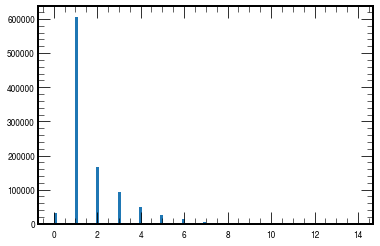

In [12]:
plt.hist(df_1.ncls_true,bins=100)
plt.show()

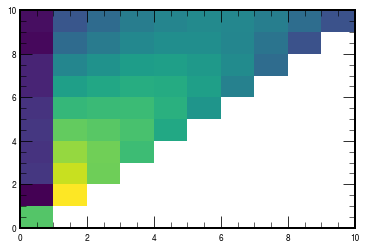

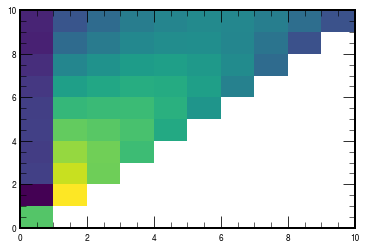

In [13]:
plt.hist2d(df_1.ncls_true,df_1.ncls_tot,  bins=(10,10), range=((0,10),(0,10)),norm=LogNorm())
plt.show()
plt.hist2d(df_2.ncls_true,df_2.ncls_tot,  bins=(10,10), range=((0,10),(0,10)),norm=LogNorm())
plt.show()

In [14]:
# Efficienza

- Quante volte una genparticle diventa un supercluster in una certa zpna di eta e phi?
- Quante volte una genparticle diventa un elettroni in una certa yona di eta e phi?


Object `phi` not found.
Object `phi` not found.


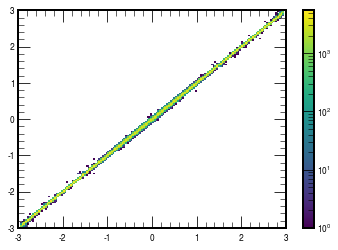

In [15]:
plt.hist2d(df_1.sc_eta,df_1.genpart_eta,bins=(150,150), range=((-3,3),(-3,3)),norm=LogNorm())
plt.colorbar()
plt.show()

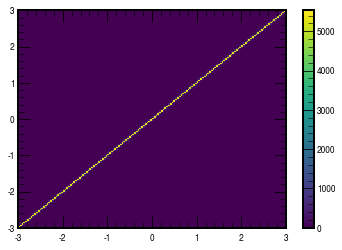

In [16]:

plt.hist2d(df_1.sc_phi,df_1.genpart_phi,bins=(150,150), range=((-3,3),(-3,3)))
plt.colorbar()
plt.show()

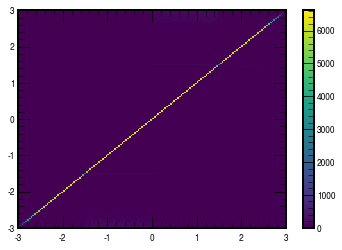

In [17]:
plt.hist2d(df_1.ele_eta,df_1.genpart_eta,bins=(150,150), range=((-3,3),(-3,3)))
plt.colorbar()
plt.show()

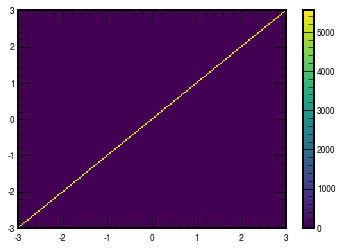

In [18]:
plt.hist2d(df_1.ele_phi,df_1.genpart_phi,bins=(150,150), range=((-3,3),(-3,3)))
plt.colorbar()
plt.show()

# Matching

In [19]:
count_values_not_equal_to_one = (df_1.calomatched != 1).sum()
count_values_not_equal_to_one2 = (df_2.calomatched != 1).sum()
print('Number of non matching:',count_values_not_equal_to_one,count_values_not_equal_to_one2)

Number of non matching: 32452 33376


In [20]:
np.sum(dfj.sc_matched_D)

941876.0

In [21]:
np.sum(dfj.elematched_D!=dfj.sc_matched_D)

30230

In [22]:
dfj[["sc_matched_D","elematched_D"]]

,sc_matched_D,elematched_D
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
971995,1.0,1.0
971996,1.0,1.0
971997,1.0,1.0
971998,1.0,1.0


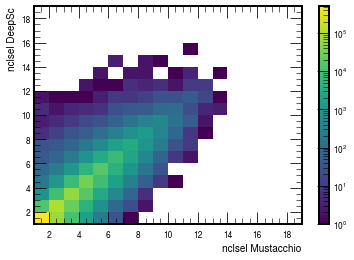

In [23]:

sc_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
dfmatched_sc = dfj[sc_matched]

xbins = list(range(1, 20))
ybins =  list(range(1, 20))

plt.hist2d(dfmatched_sc.ncls_sel_M, dfmatched_sc.ncls_sel_D, bins=(xbins,ybins),norm=LogNorm())
plt.colorbar()
plt.xlabel('nclsel Mustacchio')
plt.ylabel('nclsel DeepSc')
plt.show()

/tmp/ipykernel_627/3617780213.py:7: RuntimeWarning: invalid value encountered in divide
  a = A/s


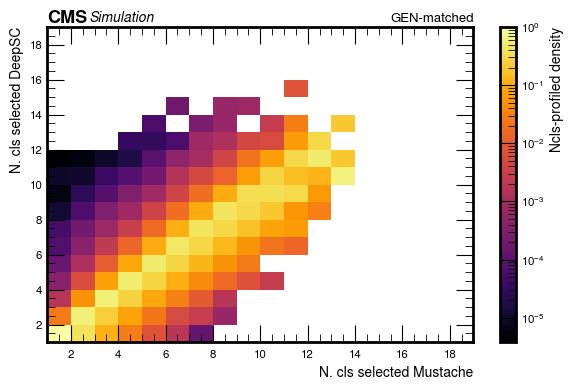

In [24]:
fig, ax = plt.subplots(1,1,dpi=100)

A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.ncls_sel_D, bins=(xbins, ybins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("N. cls selected DeepSC")
ax.set_xlabel("N. cls selected Mustache")

hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig('Plot1/ncls.png')

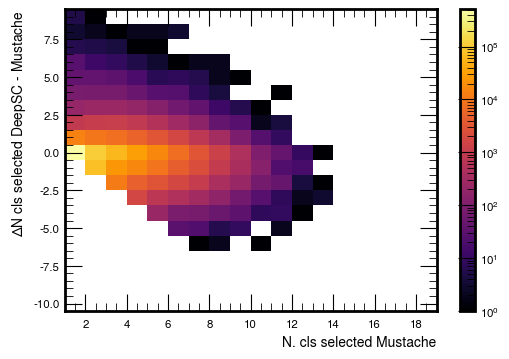

/tmp/ipykernel_627/1093954412.py:19: RuntimeWarning: invalid value encountered in divide
  a = A/s


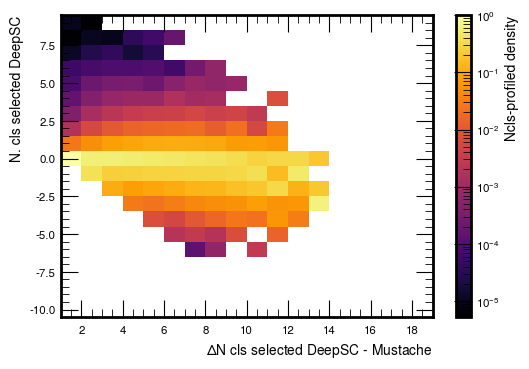

In [25]:
ybins =  [f+0.5 for f in range(-11, 10)]
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.ncls_sel_D-dfmatched_sc.ncls_sel_M, bins=(xbins, ybins ))

X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, cmap="inferno",norm=LogNorm())

fig.colorbar(I, ax=ax)
ax.set_xlabel("N. cls selected Mustache")
ax.set_ylabel("$\Delta N$ cls selected DeepSC - Mustache")
plt.show()

fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, 
                                  dfmatched_sc.ncls_sel_D-dfmatched_sc.ncls_sel_M, bins=(xbins, ybins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("N. cls selected DeepSC")
ax.set_xlabel("$\Delta N$ cls selected DeepSC - Mustache")
plt.show()

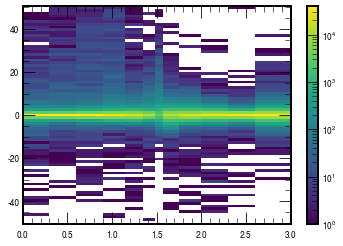

In [26]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = np.linspace(-50.5,50.5,80)
plt.hist2d(dfmatched_sc.seed_eta_M, dfmatched_sc.et_sc_calib_D - dfmatched_sc.et_sc_calib_M,bins=(etas,xbins),norm=LogNorm())
plt.colorbar(norm=LogNorm(vmax=1), cmap="inferno")
plt.show()

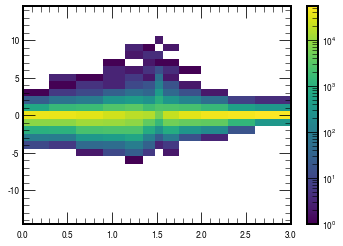

In [27]:
ybins = np.linspace(-14.5,14.5,30)
plt.hist2d(dfmatched_sc.seed_eta_M, dfmatched_sc.ncls_sel_D - dfmatched_sc.ncls_sel_M,bins=(etas,ybins),norm=LogNorm())
plt.colorbar()
plt.show()

# Comparison of the refinement

- ele_nclsRefinedSC
- ele_nclsEcalSC

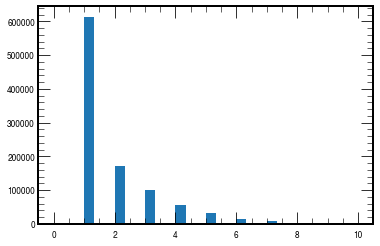

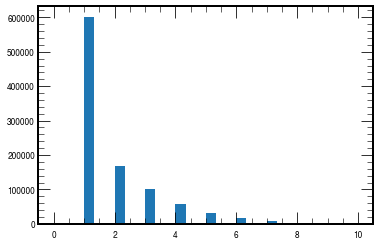

In [28]:
plt.hist(df_1.ele_nclsRefinedSC, bins=30, range=[0, 10])
plt.show()
plt.hist(df_1.ele_nclsEcalSC, bins=30, range=[0, 10])
plt.show()

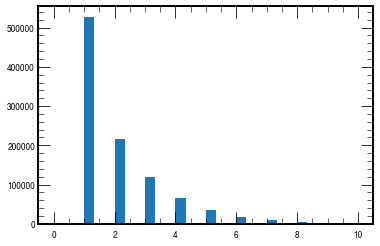

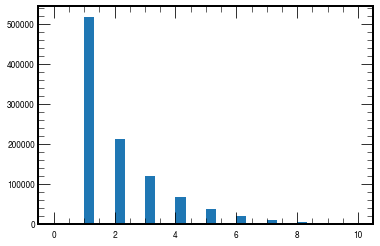

In [29]:
plt.hist(df_2.ele_nclsRefinedSC, bins=30, range=[0, 10])
plt.show()
plt.hist(df_2.ele_nclsEcalSC, bins=30, range=[0, 10])
plt.show()

/tmp/ipykernel_627/1818474989.py:10: RuntimeWarning: invalid value encountered in divide
  a = A/s


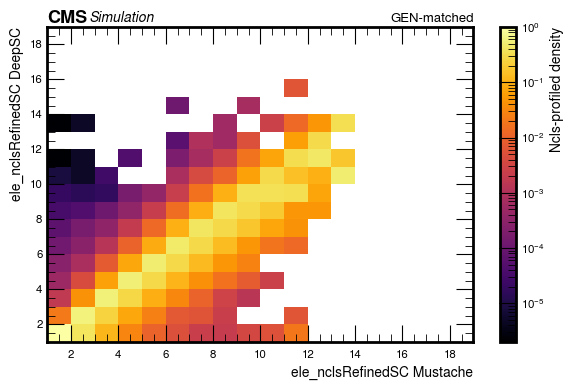

In [30]:
xbins = list(range(1, 20))
ybins =  list(range(1, 20))


fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ele_nclsRefinedSC_M, 
                                  dfmatched_sc.ele_nclsRefinedSC_D, bins=(xbins, ybins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("ele_nclsRefinedSC DeepSC")
ax.set_xlabel("ele_nclsRefinedSC Mustache")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig('Plot1/ncls_refined.png')

/tmp/ipykernel_627/685308207.py:6: RuntimeWarning: invalid value encountered in divide
  a = A/s


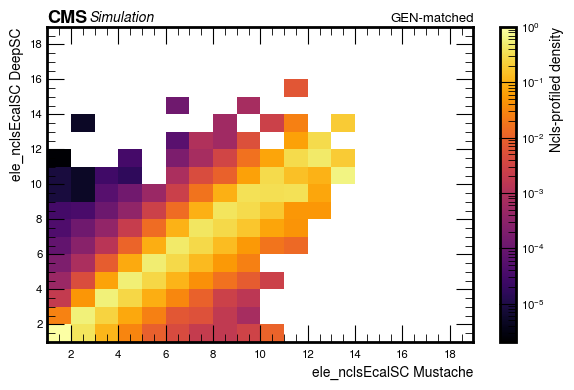

In [31]:
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ele_nclsEcalSC_M, 
                                  dfmatched_sc.ele_nclsEcalSC_D, bins=(xbins, ybins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("ele_nclsEcalSC DeepSC")
ax.set_xlabel("ele_nclsEcalSC Mustache")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()

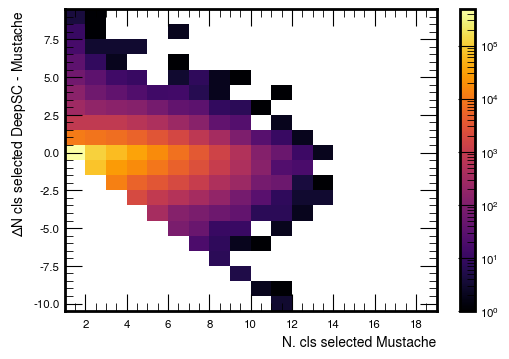

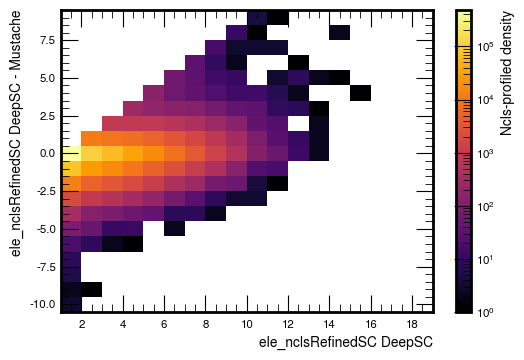

In [32]:
ybins =  [f+0.5 for f in range(-11, 10)]
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ele_nclsRefinedSC_M, 
                                  dfmatched_sc.ele_nclsRefinedSC_D-dfmatched_sc.ele_nclsRefinedSC_M, bins=(xbins, ybins ))

X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, cmap="inferno",norm=LogNorm())

fig.colorbar(I, ax=ax)
ax.set_xlabel("N. cls selected Mustache")
ax.set_ylabel("$\Delta N$ cls selected DeepSC - Mustache")
plt.show()

fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ele_nclsRefinedSC_D, 
                                  dfmatched_sc.ele_nclsRefinedSC_D-dfmatched_sc.ele_nclsRefinedSC_M, bins=(xbins, ybins ))

X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_xlabel("ele_nclsRefinedSC DeepSC")
ax.set_ylabel("ele_nclsRefinedSC DeepSC - Mustache")
plt.show()

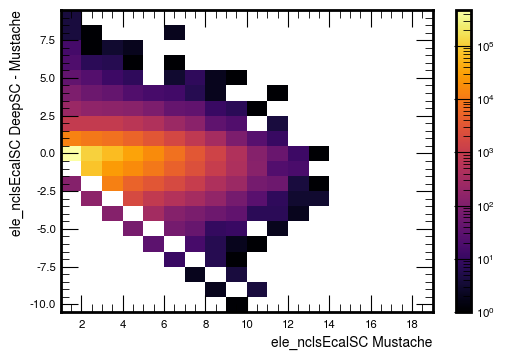

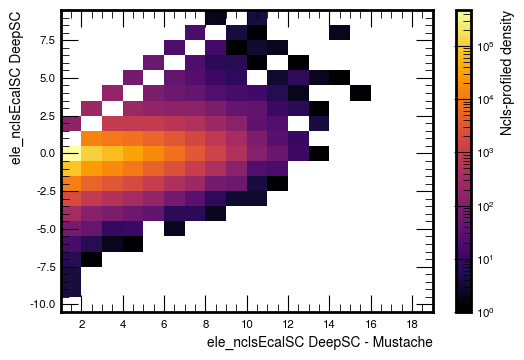

In [33]:
ybins =  [f+0.5 for f in range(-11, 10)]
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ele_nclsEcalSC_M, 
                                  dfmatched_sc.ele_nclsEcalSC_D-dfmatched_sc.ele_nclsEcalSC_M, bins=(xbins, ybins ))

X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, cmap="inferno",norm=LogNorm())

fig.colorbar(I, ax=ax)
ax.set_xlabel("ele_nclsEcalSC Mustache")
ax.set_ylabel("ele_nclsEcalSC DeepSC - Mustache")
plt.show()

fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ele_nclsEcalSC_D, 
                                  dfmatched_sc.ele_nclsEcalSC_D-dfmatched_sc.ele_nclsEcalSC_M, bins=(xbins, ybins ))


X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=LogNorm(), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("ele_nclsEcalSC DeepSC")
ax.set_xlabel("ele_nclsEcalSC DeepSC - Mustache")
plt.show()

## dependece on eta

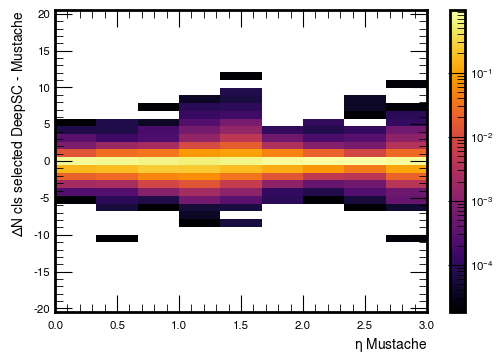

In [34]:
etas =  np.linspace(0,3,10)
xbins = np.linspace(-20.5,20.5,40)
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_M, 
                                  dfmatched_sc.ele_nclsRefinedSC_D-dfmatched_sc.ele_nclsRefinedSC_M, bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, cmap="inferno",norm=LogNorm())

fig.colorbar(I, ax=ax)
ax.set_xlabel("$\eta$ Mustache")
ax.set_ylabel("$\Delta N$ cls selected DeepSC - Mustache")
plt.show()

## Step two

In [35]:
DM=dfmatched_sc.ele_nclsRefinedSC_M-dfmatched_sc.ele_nclsEcalSC_M
DD=dfmatched_sc.ele_nclsRefinedSC_D-dfmatched_sc.ele_nclsEcalSC_D

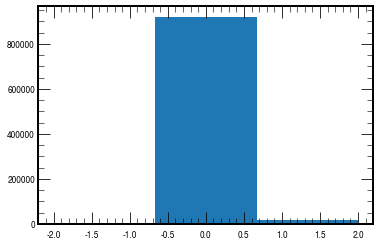

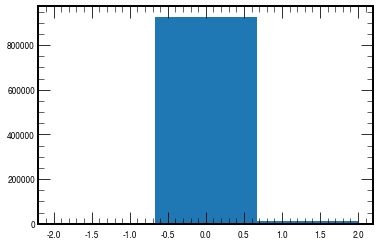

In [36]:
plt.hist(DM, bins=3, range=[-2, 2])
plt.show()
plt.hist(DD, bins=3, range=[-2, 2])
plt.show()

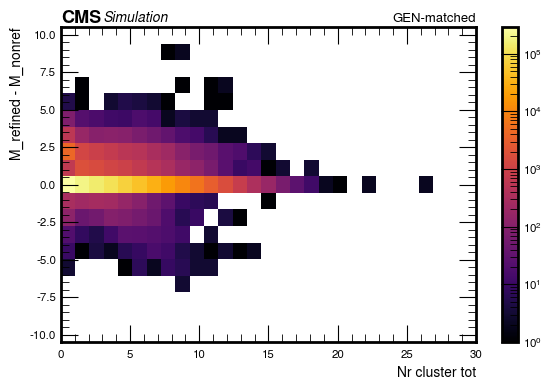

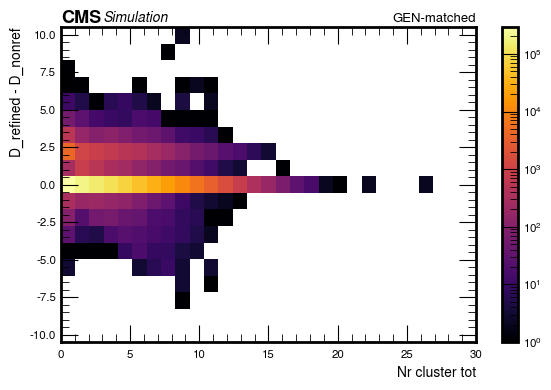

In [37]:
xbins=np.linspace(-10.5,10.5,20)
clbins=np.linspace(0,30,30)
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_tot_M, DM, bins=(clbins, xbins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="")
ax.set_ylabel("M_refined - M_nonref")
ax.set_xlabel("Nr cluster tot")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_tot_D, DD, bins=(clbins, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="")
ax.set_ylabel("D_refined - D_nonref")
ax.set_xlabel("Nr cluster tot")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.show()

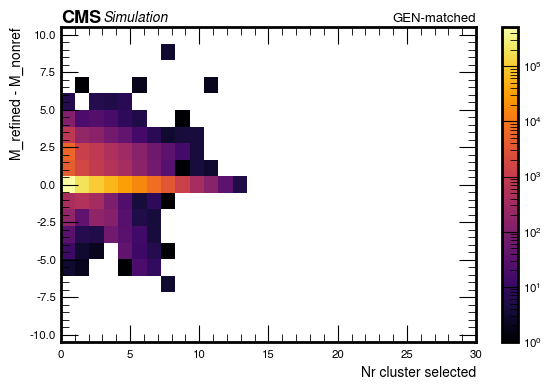

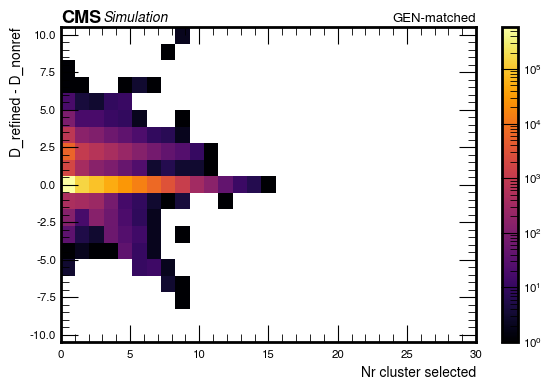

In [38]:
xbins=np.linspace(-10.5,10.5,20)
clbins=np.linspace(0,30,30)
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_M, DM, bins=(clbins, xbins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="")
ax.set_ylabel("M_refined - M_nonref")
ax.set_xlabel("Nr cluster selected")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_D, DD, bins=(clbins, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="")
ax.set_ylabel("D_refined - D_nonref")
ax.set_xlabel("Nr cluster selected")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.show()

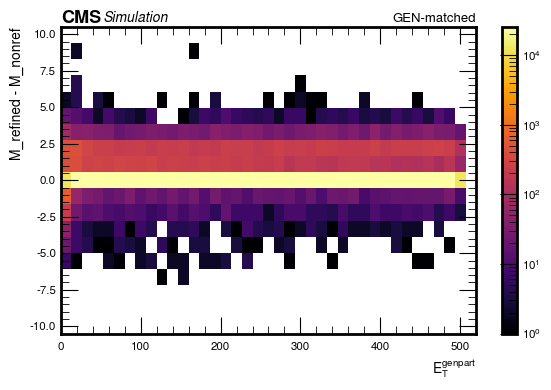

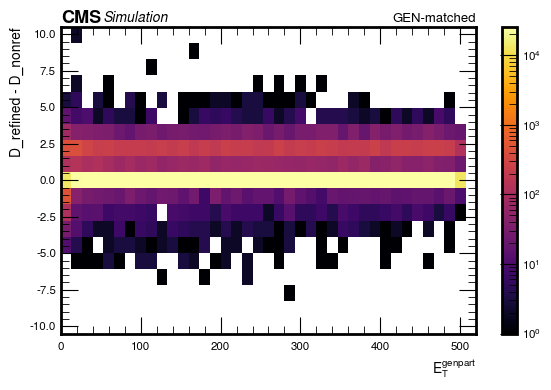

In [39]:
xbins=np.linspace(-10.5,10.5,20)
clbins=np.linspace(0,520,40)
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.genpart_et_M, DM, bins=(clbins, xbins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="")
ax.set_ylabel("M_refined - M_nonref")
ax.set_xlabel("$E_T^{genpart}$")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.genpart_et_D, DD, bins=(clbins, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="")
ax.set_ylabel("D_refined - D_nonref")
ax.set_xlabel("$E_T^{genpart}$")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.show()

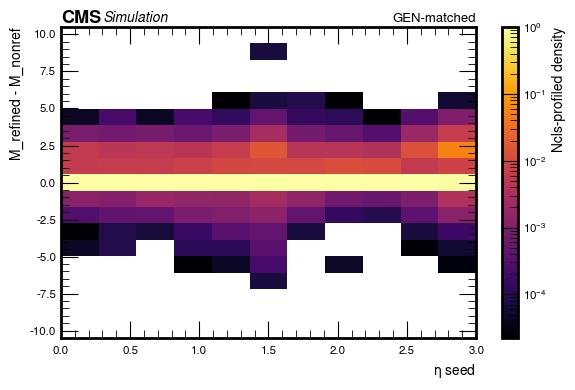

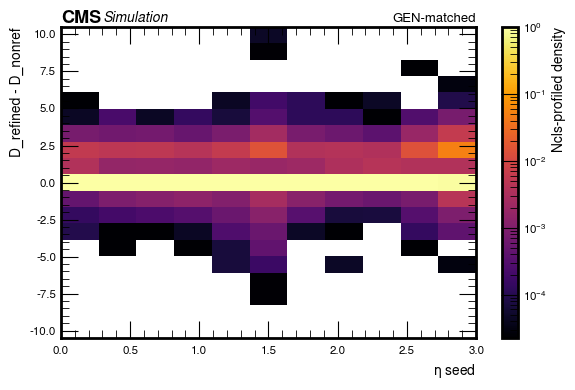

In [40]:
etas =  np.linspace(0,3,12)
xbins = np.linspace(-10.5,10.5,20)

fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_M, DM, bins=(etas, xbins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("M_refined - M_nonref")
ax.set_xlabel("$\eta$ seed")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_D, DD, bins=(etas, xbins ))

s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(vmax=1), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("D_refined - D_nonref")
ax.set_xlabel("$\eta$ seed")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()

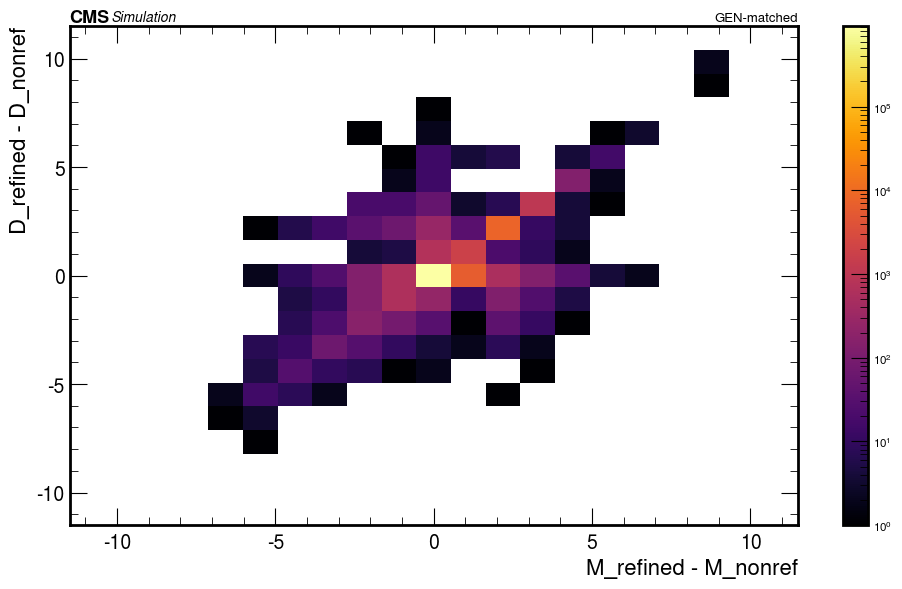

In [44]:
xbins = np.linspace(-11.5,11.5,22)

fig, ax = plt.subplots(1,1,figsize=(10,6),dpi=100)
A,xedges,yedges  = np.histogram2d(DM, DD, bins=(xbins, xbins ))

s = 1 #np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax)
ax.set_ylabel("D_refined - D_nonref",fontsize=16)
ax.set_xlabel("M_refined - M_nonref",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig('Plot1/DM_DD.png')

## exploring energy reagion 

In [45]:
max_valueM = dfmatched_sc.et_seed_M.max()
min_valueM = dfmatched_sc.et_seed_M.min()
max_valueD = dfmatched_sc.et_seed_D.max()
min_valueD = dfmatched_sc.et_seed_D.min()

print("Maximum Value:", max_valueM)
print("Minimum Value:", min_valueM)
print("Maximum Value:", max_valueD)
print("Minimum Value:", min_valueD)

Maximum Value: 576.0658553826937
Minimum Value: 0.8068967232461163
Maximum Value: 576.0658553826937
Minimum Value: 0.8068967232461163


In [46]:
def DM_DD_energy(l,u,norm):
    xbins = np.linspace(-9.5,9.5,22)
    e = (dfmatched_sc.et_seed_M<u)&(dfmatched_sc.et_seed_M>l)&(dfmatched_sc.et_seed_D<u)&(dfmatched_sc.et_seed_D>l)
    dfmatched_sc_e = dfmatched_sc[e]
    DM=dfmatched_sc_e.ele_nclsRefinedSC_M-dfmatched_sc_e.ele_nclsEcalSC_M
    DD=dfmatched_sc_e.ele_nclsRefinedSC_D-dfmatched_sc_e.ele_nclsEcalSC_D
    
    fig, ax = plt.subplots(1,1,dpi=100)
    A,xedges,yedges  = np.histogram2d(DM, DD, bins=(xbins, xbins ))

    s=1
    if norm:
        s = np.expand_dims(np.sum(A, axis=-1), axis=1)
    a = A/s
    X, Y = np.meshgrid(xedges, yedges)
    I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
    fig.colorbar(I, ax=ax)
    ax.set_ylabel("D_refined - D_nonref")
    ax.set_xlabel("M_refined - M_nonref")
    hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
    plt.title('Energy from '+ str(l) +' to '+str(u),fontsize=16)
    plt.tight_layout()
    plt.savefig('Energy'+ str(l) +'_'+str(u)+'.png')

/tmp/ipykernel_627/5933250.py:14: RuntimeWarning: invalid value encountered in divide
  a = A/s


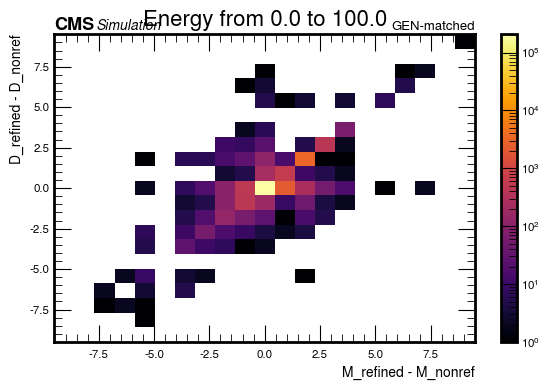

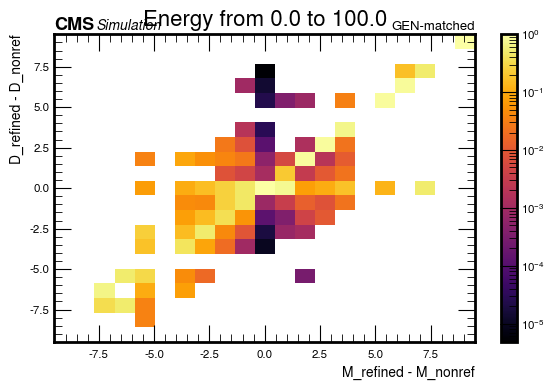

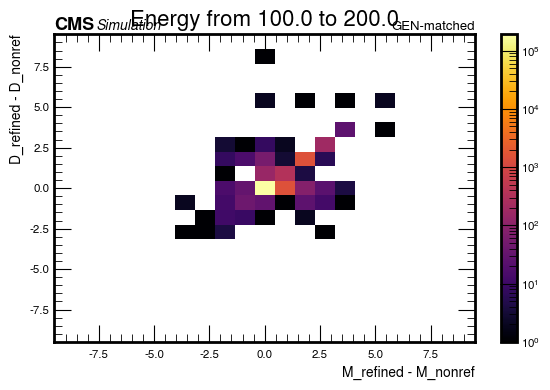

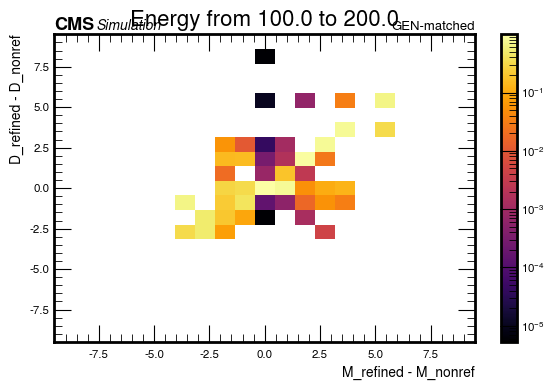

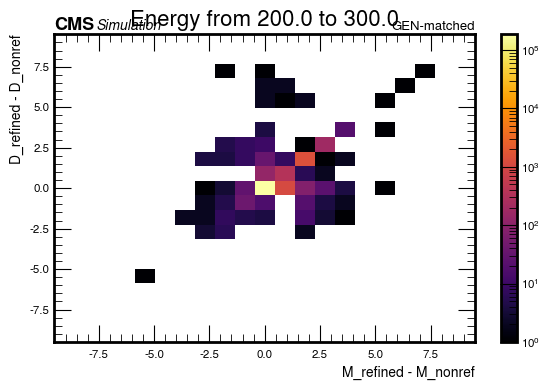

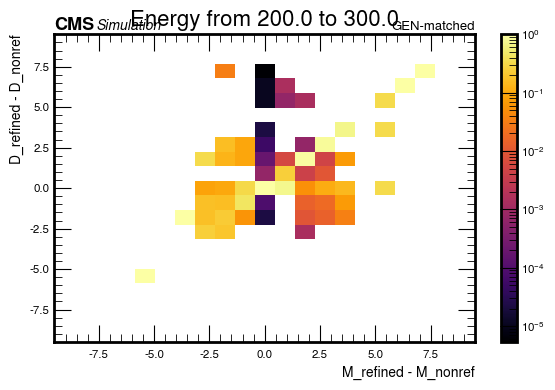

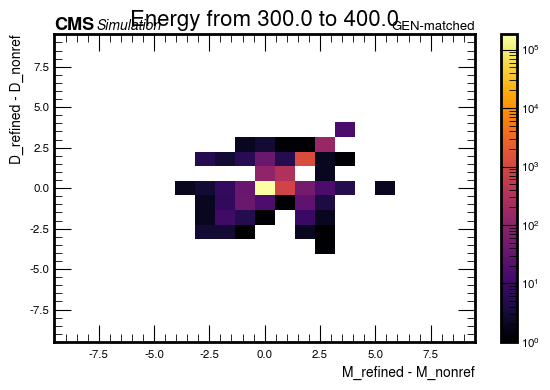

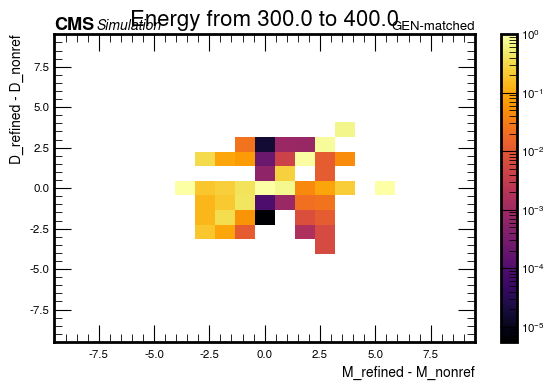

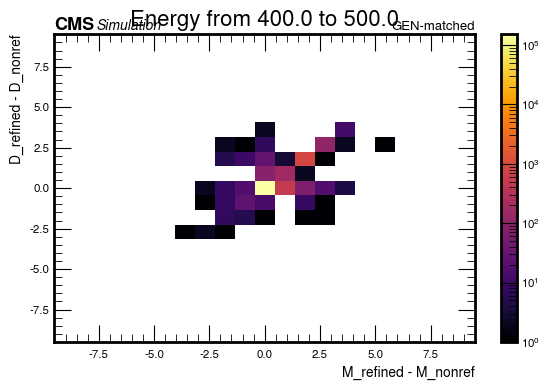

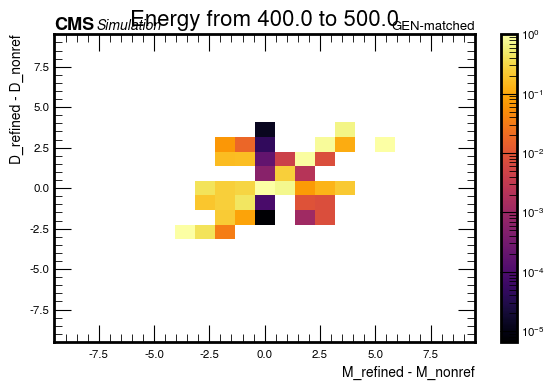

In [47]:
intervall=np.linspace(0,500,6)
for i in range(len(intervall)-1):
    DM_DD_energy(intervall[i],intervall[i+1],False)
    DM_DD_energy(intervall[i],intervall[i+1],True)

## table percentage

In [48]:
sector=[]
sector+=[(DD>0)&(DM<0)&(DD<abs(DM))]
sector+=[(DD>0)&(DM<0)&(DD>abs(DM))]
sector+=[(DD>0)&(DM>0)&(DD>abs(DM))]
sector+=[(DD>0)&(DM>0)&(DD<abs(DM))]
sector+=[(DD<0)&(DM>0)&(abs(DD)<abs(DM))]
sector+=[(DD<0)&(DM>0)&(abs(DD)>abs(DM))]
sector+=[(DD<0)&(DM<0)&(abs(DD)>abs(DM))]
sector+=[(DD<0)&(DM<0)&(abs(DD)<abs(DM))]
sector+=[(DD==0)&(DM==0)]
sector+=[(DM==0) & DD!=0]
sector+=[(DD==0)&DM!=0]
sector+=[(DD>0)&(DM<0)&(DD==abs(DM)) | (DD<0)&(DM>0)&(abs(DD)==abs(DM))]
sector+=[(DD>0)&(DM>0)&(DD==abs(DM)) | (DD<0)&(DM<0)&(abs(DD)==abs(DM))]

In [49]:
#sanity check
tot=len(dfmatched_sc.ncls_sel_M)

m1=sector[1] | sector[2] 
m2=sector[3] | sector[0]
m3=sector[6] | sector[5]
m4=sector[4] | sector[7]

p1=len(DD[m1])/tot
p2=len(DD[m2])/tot
p3=len(DD[m3])/tot
p4=len(DD[m4])/tot

formatted_output = "{:.3g}, {:.3g}, {:.3g}, {:.3g}".format(p1, p2, p3, p4)
print(formatted_output)

0.000183, 8.61e-05, 0.000182, 0.000399


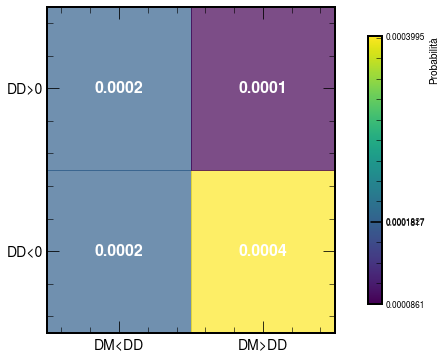

In [50]:
probabilities=np.array([p3,p4,p1,p2])
fig, ax = plt.subplots(figsize=(6, 6))
norm = plt.Normalize(min(probabilities), max(probabilities))
colors = cm.viridis(norm(probabilities))
for i, prob in enumerate(probabilities):
    rect = plt.Rectangle((i % 2, i // 2), 1, 1, color=colors[i], alpha=0.7)
    ax.add_patch(rect)
    ax.annotate(f'{prob:.4f}', (i % 2 + 0.5, i // 2 + 0.5),
                color='white', weight='bold', fontsize=16,
                ha='center', va='center')

sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=probabilities, orientation='vertical', fraction=0.04, pad=0.1, ax=ax)
cbar.set_label('Probabilità')

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xticks([0.5, 1.5])
ax.set_yticks([0.5, 1.5])
ax.set_xticklabels(['DM<DD', 'DM>DD'],fontsize=14)
ax.set_yticklabels(['DD<0', 'DD>0'],fontsize=14)
plt.show()

In [51]:
prob=[len(DD[sector[i]])/tot for i in range(13)]
print(prob)
eps=[dfmatched_sc.ncls_tot_D[sector[i]] for i in range(8)]

[2.7624103943128344e-05, 0.00011793367452643255, 6.481039771272419e-05, 5.843560449507919e-05, 0.0001806191411666084, 1.3812051971564172e-05, 0.0001678695547313184, 0.00021886790047247843, 0.9769699970357212, 0.0014226413530711098, 0.007991865763854284, 9.880929487349754e-05, 0.012666714123460621]


[(0.0, 0.6), (0.6, 1.2), (1.2, 1.7999999999999998), (1.7999999999999998, 2.4), (2.4, 3.0)]


/tmp/ipykernel_627/2719609526.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n1=len(df_e[sector[i]])


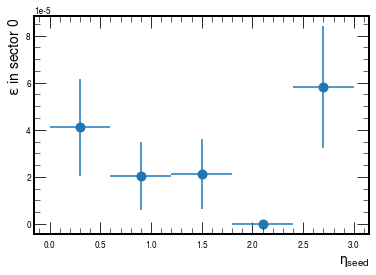

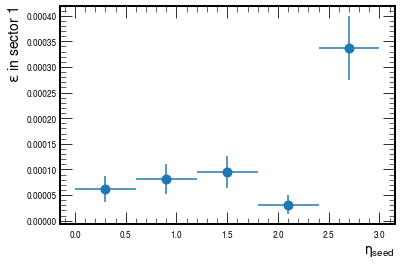

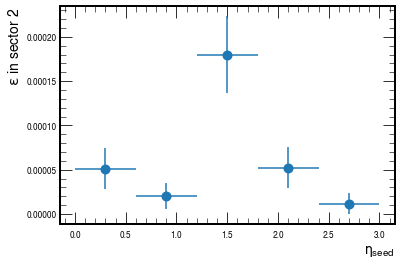

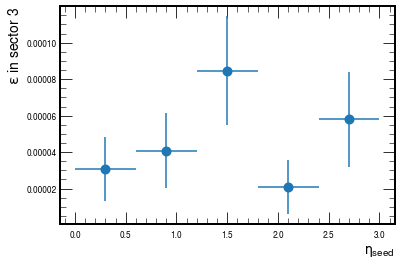

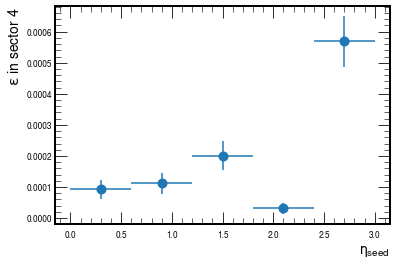

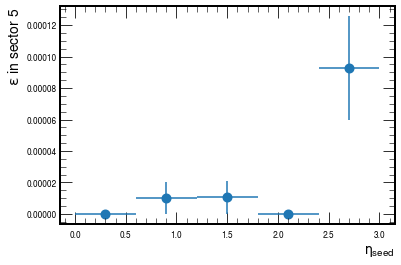

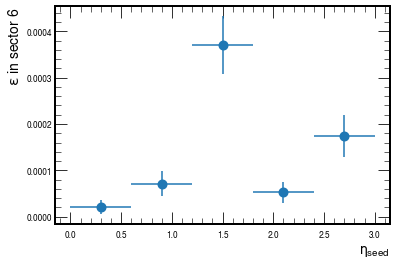

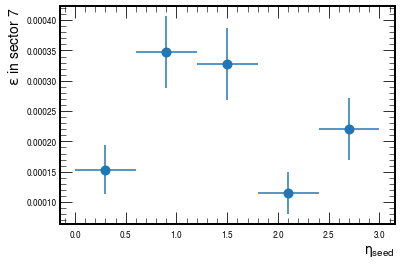

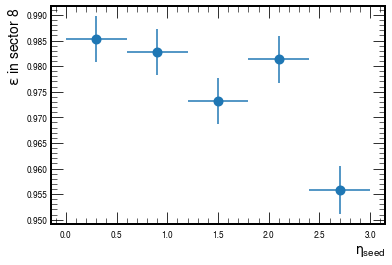

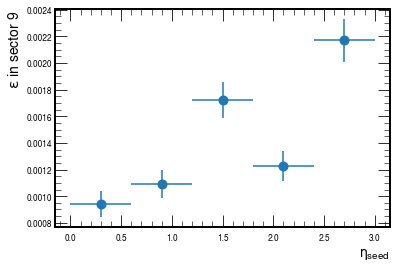

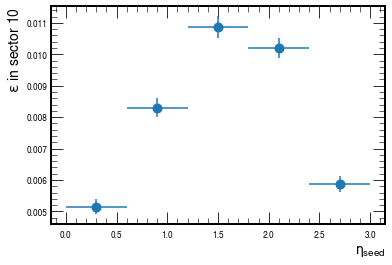

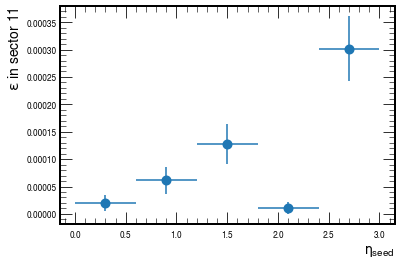

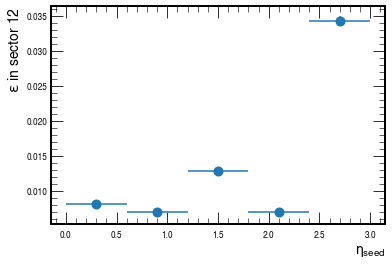

In [79]:


def eps_prob4(df, colonna, num_intervalli,x):
    larghezza_intervallo = x / num_intervalli
    intervalli_eta = [(i * larghezza_intervallo, (i + 1) * larghezza_intervallo) for i in range(num_intervalli)]
    print(intervalli_eta)
    for i in range(13):
        eps_values = []
        yerr=[]
        for lower, upper in intervalli_eta:
            mask = (df[colonna] < upper) & (df[colonna] >= lower)
            df_e = df[mask]
            n1=len(df_e[sector[i]])
            ntot=len(df_e)
            eps = n1/ntot
            eps_values.append(eps)
            yerr+=[np.sqrt(n1+n1**2/ntot)/ntot]

        x_values = [lower + larghezza_intervallo / 2 for lower, _ in intervalli_eta]

        plt.errorbar(x_values, eps_values,yerr=yerr, xerr=np.ones(num_intervalli) * larghezza_intervallo / 2, fmt='none')
        plt.scatter(x_values, eps_values, linewidths=4)

        plt.ylabel('$\epsilon$ in sector ' + str(i), fontsize=14)
        plt.xlabel('$\eta_{seed}$', fontsize=14)
        filename = f'Plot1/eps_sector_{i}_intervallo_{num_intervalli}.png'
        plt.savefig(filename)
        plt.show()

eps_prob4(dfmatched_sc, 'seed_eta_D' ,5,3)


eta specifico:  [0, 0.5, 1, 1.5, 2.25, 3]

/tmp/ipykernel_627/1491916745.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n1 = len(df_e[sector[i]])


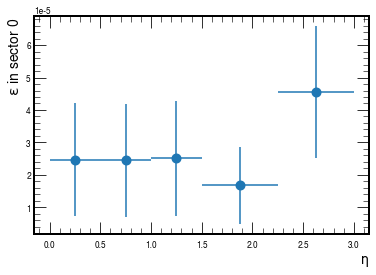

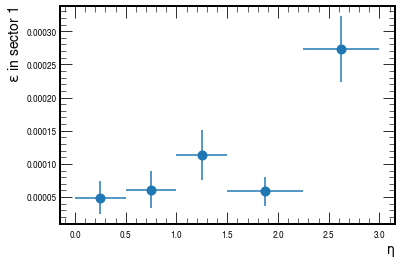

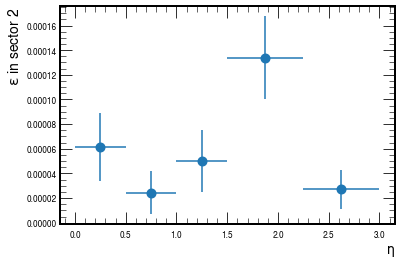

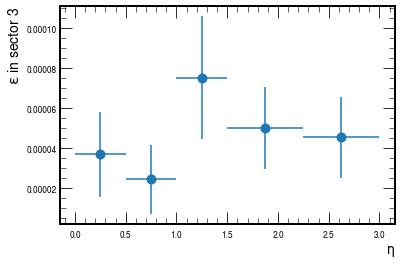

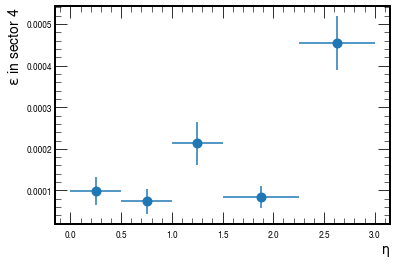

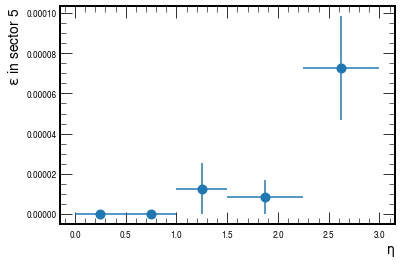

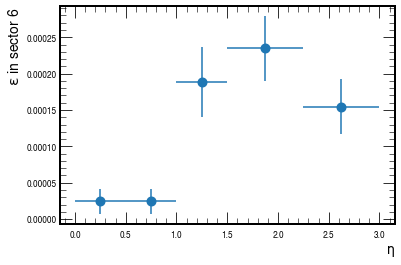

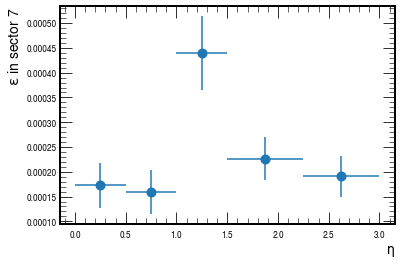

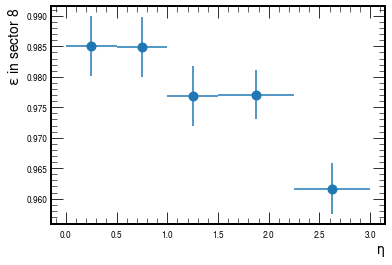

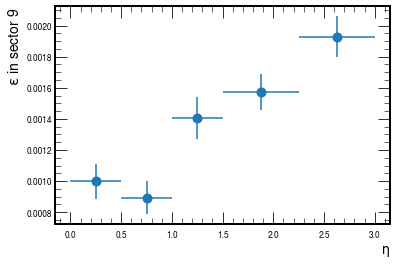

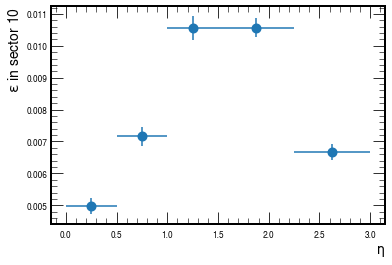

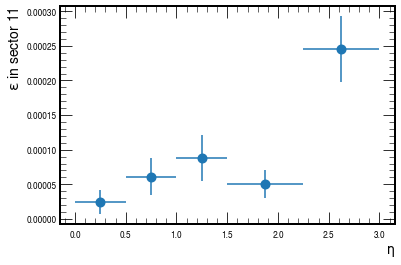

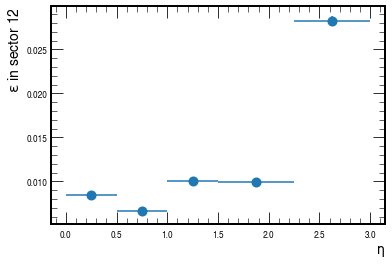

In [71]:
def eps_prob(df, colonna, intervals):
    for i in range(13):
        eps_values = []
        yerr = []
        larghezza_intervallo = np.diff(intervals)

        for j in range(len(intervals) - 1):
            lower = intervals[j]
            upper = intervals[j + 1]
            
            mask = (df[colonna] < upper) & (df[colonna] >= lower)
            df_e = df[mask]
            n1 = len(df_e[sector[i]])
            ntot = len(df_e)
            eps = n1 / ntot
            eps_values.append(eps)
            yerr.append(np.sqrt(n1 + n1**2 / ntot) / ntot)

        x_values = [lower + larghezza_intervallo[j] / 2 for j, lower in enumerate(intervals[:-1])]

        plt.errorbar(x_values, eps_values, yerr=yerr, xerr=np.ones(len(intervals) - 1) * larghezza_intervallo / 2, fmt='none')
        plt.scatter(x_values, eps_values, linewidths=4)

        plt.ylabel('$\epsilon$ in sector ' + str(i), fontsize=14)
        plt.xlabel('$\eta$', fontsize=14)
        filename = f'eps_sector_{i}_intervallo_{len(intervals)}.png'
        plt.savefig(filename)
        plt.show()

# Esempio di utilizzo
intervals = np.array([0, 0.5, 1, 1.5, 2.25, 3])

eps_prob(dfmatched_sc, 'seed_eta_M', intervals)


## Sectors in function of $\eta$

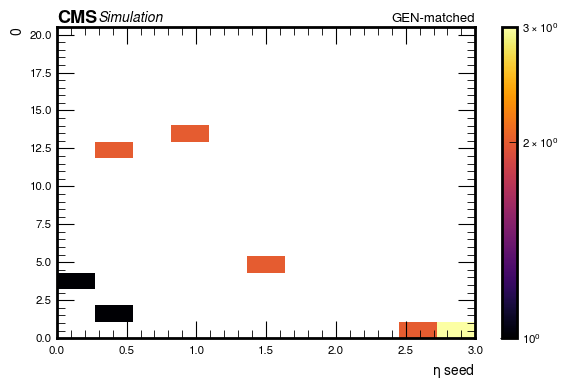

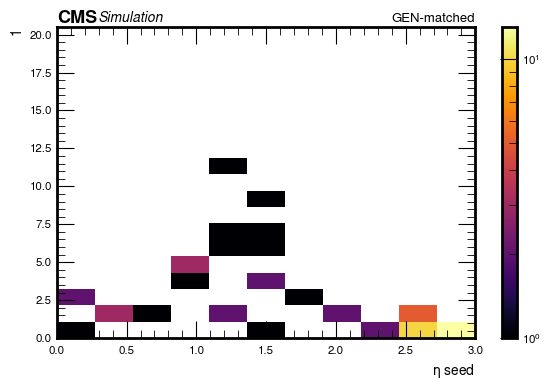

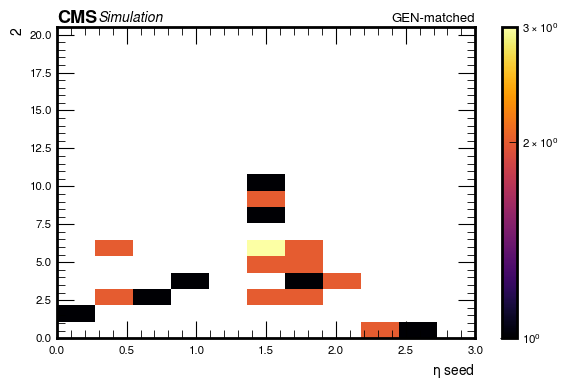

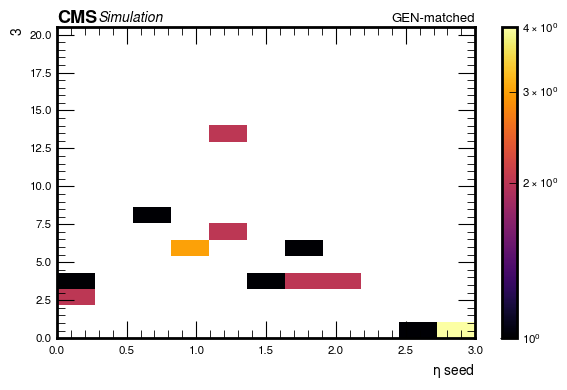

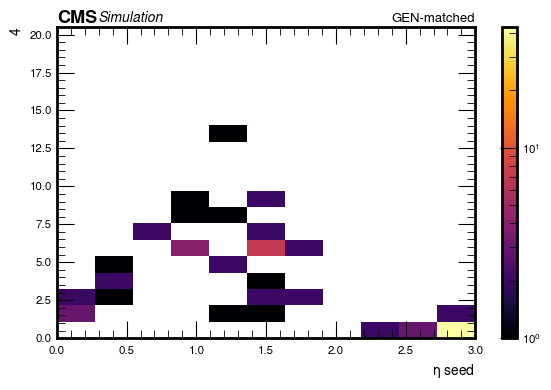

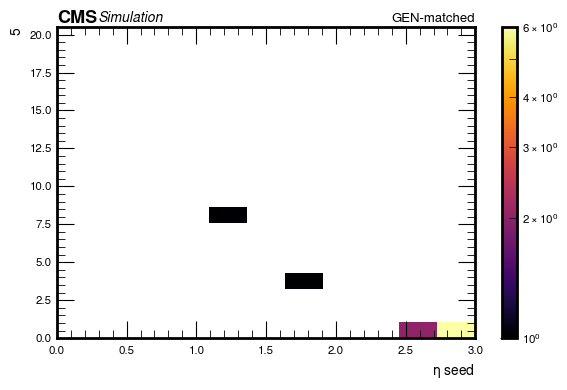

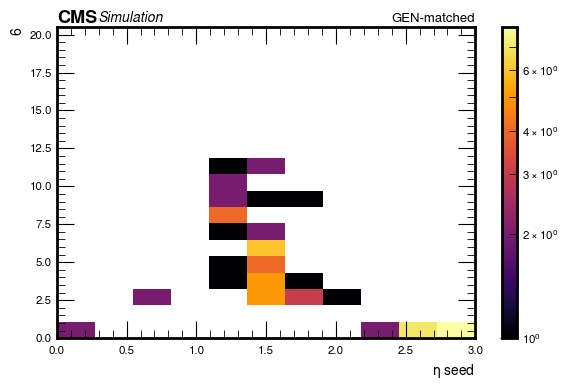

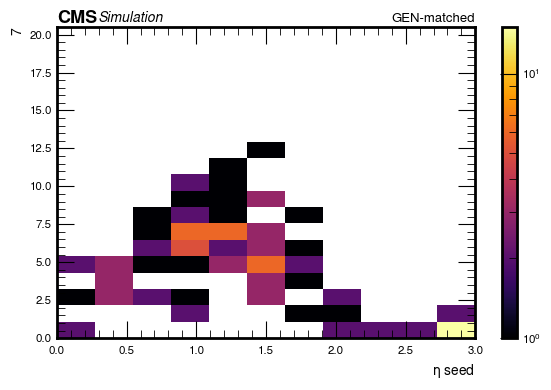

TypeError: sec_eta() missing 2 required positional arguments: 'xbins' and 'etas'

In [54]:
def sec_eta(index, i,norm,DD,xbins,etas):
    fig, ax = plt.subplots(1,1,dpi=100)
    A,xedges,yedges  = np.histogram2d(dfmatched_sc.seed_eta_D[index], DD[index], bins=(etas, xbins ))
    
    s=1
    if norm:
        s = np.expand_dims(np.sum(A, axis=-1), axis=1)
    a = A/s
    X, Y = np.meshgrid(xedges, yedges)
    I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
    fig.colorbar(I, ax=ax)
    ax.set_ylabel(str(i))
    ax.set_xlabel("$\eta$ seed")
    hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
    plt.tight_layout()
    plt.show()


etas =  np.linspace(0,3,12)
xbins = np.linspace(0,20.5,20)
for i in range(8):
    sec_eta(sector[i],i,False,dfmatched_sc.ncls_tot_D,xbins,etas)
for i in range(8):
    sec_eta(sector[i],i,False,DD)

## Sectors in function of Ncl tot and sel:

In [ ]:
def ncl_tot_sec(index,i,norm):
    xbins=np.linspace(-10.5,10.5,20)
    clbins=np.linspace(0,30,30)
    fig, ax = plt.subplots(1,1,dpi=100)
    A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_tot_D[index], DD[index], bins=(clbins, xbins ))
    s=1
    if norm: s = np.expand_dims(np.sum(A, axis=-1), axis=1)
    a = A/s
    X, Y = np.meshgrid(xedges, yedges)
    I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
    fig.colorbar(I, ax=ax, label="")
    ax.set_ylabel("D_refined - D_nonref in sector "+str(i))
    ax.set_xlabel("Nr cluster tot")
    hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
    plt.tight_layout()
    plt.show()

def ncl_sel_sec(index,i,norm):
    xbins=np.linspace(-10.5,10.5,20)
    clbins=np.linspace(0,30,30)
    fig, ax = plt.subplots(1,1,dpi=100)
    A,xedges,yedges  = np.histogram2d(dfmatched_sc.ncls_sel_D[index], DD[index], bins=(clbins, xbins ))
    s=1
    if norm: s = np.expand_dims(np.sum(A, axis=-1), axis=1)
    a = A/s
    X, Y = np.meshgrid(xedges, yedges)
    I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
    fig.colorbar(I, ax=ax, label="")
    ax.set_ylabel("D_refined - D_nonref in sector "+str(i))
    ax.set_xlabel("Nr cluster selected")
    hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
    plt.tight_layout()
    plt.show()
    
for i in range(8):
    ncl_tot_sec(sector[i],i,False)
for i in range(8):
    ncl_sel_sec(sector[i],i,False)

# Mask nclustM==nclustD  
ncls_sel',
 'ncls_sel_true',
 'ncls_sel_false',
 'ncls_true',
 'ncls_tot',

In [55]:
mask=dfmatched_sc.ncls_tot_M==dfmatched_sc.ncls_tot_D
DD_maskncl=DD[mask]
DM_maskncl=DM[mask]

In [56]:
def DM_DD(index,i,norm):
    xbins=np.linspace(-10.5,10.5,20)
    fig, ax = plt.subplots(1,1,dpi=100)
    A,xedges,yedges  = np.histogram2d(DM_maskncl[index], DD_maskncl[index], bins=(xbins, xbins ))
    s=1
    if norm: s = np.expand_dims(np.sum(A, axis=-1), axis=1)
    a = A/s
    X, Y = np.meshgrid(xedges, yedges)
    I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
    fig.colorbar(I, ax=ax, label="")
    ax.set_ylabel("D_refined - D_nonref in sector "+str(i))
    ax.set_xlabel("M_refined - M_nonref in sector "+str(i))
    hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
    plt.tight_layout()
    plt.show()

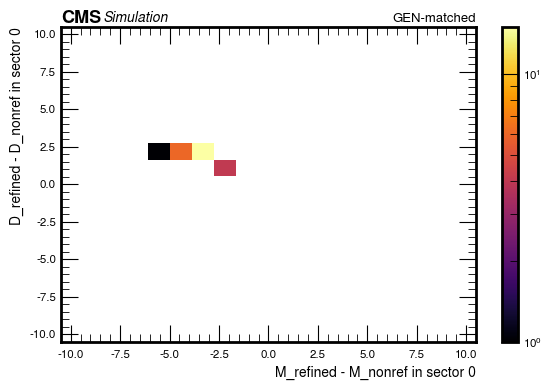

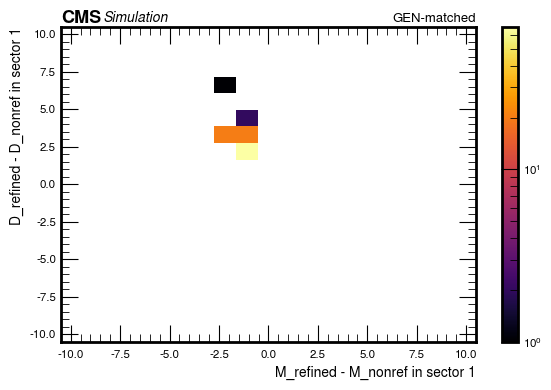

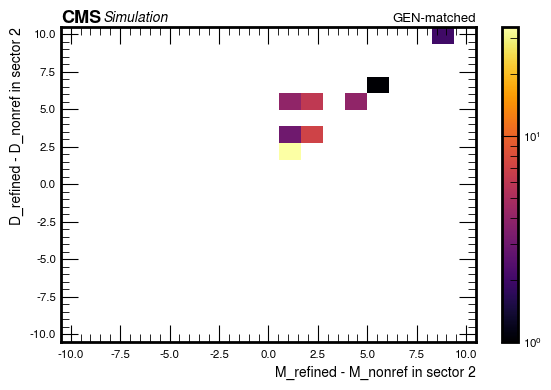

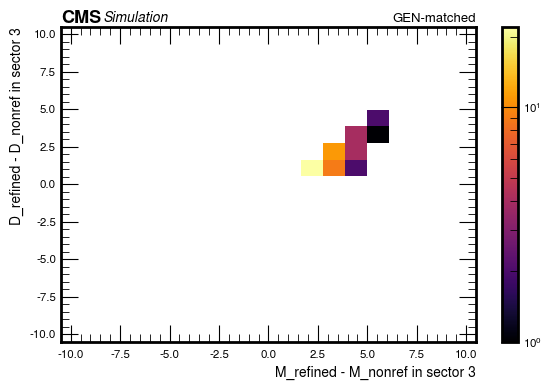

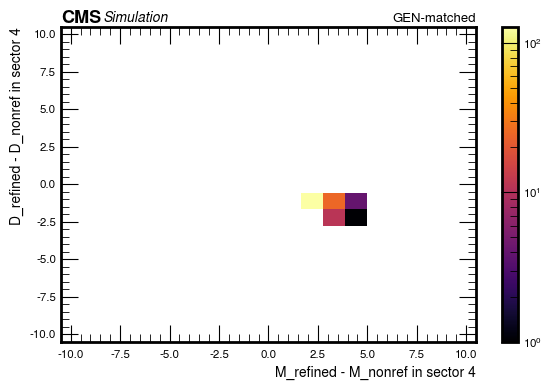

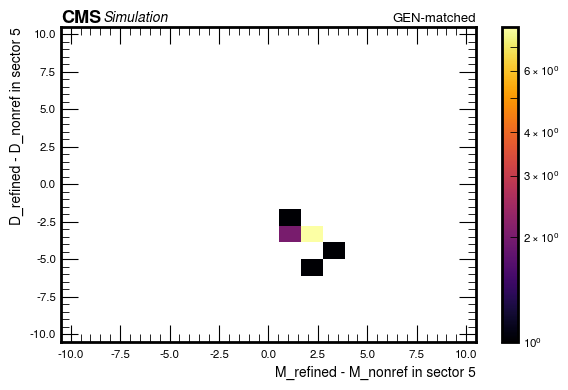

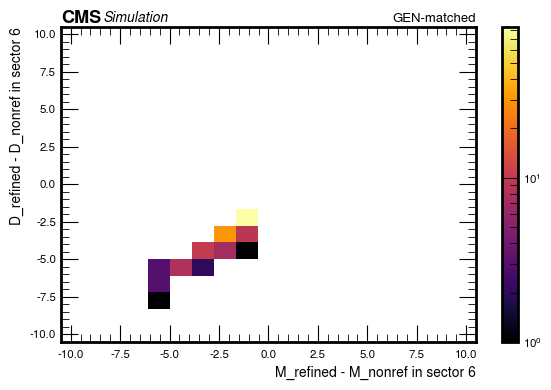

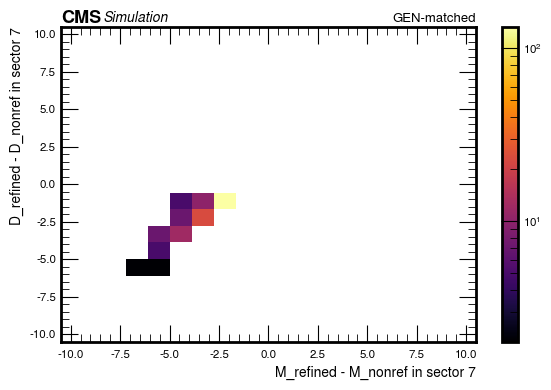

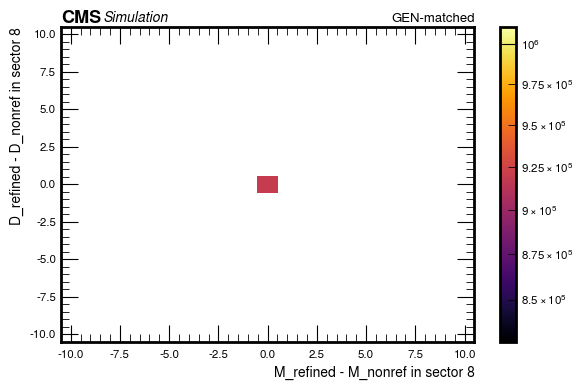

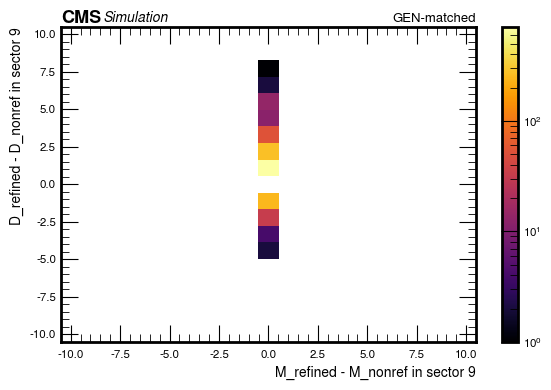

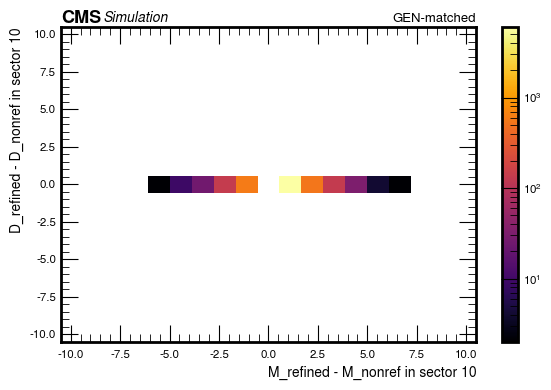

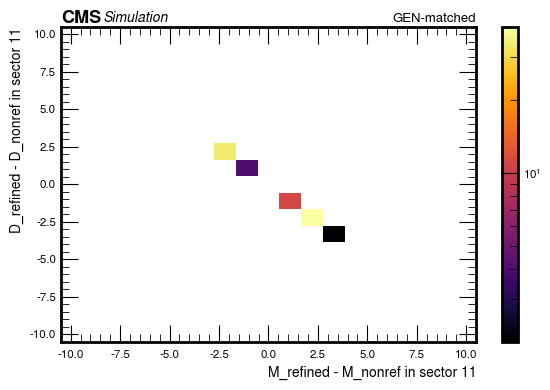

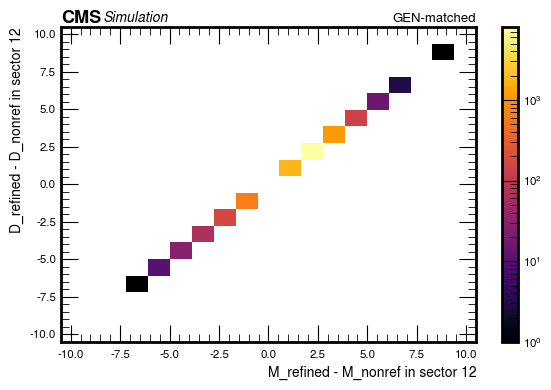

In [57]:
for i in range(13):
    DM_DD(sector[i],i,False)

[(0.0, 1.0), (1.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0), (5.0, 6.0), (6.0, 7.0), (7.0, 8.0), (8.0, 9.0), (9.0, 10.0), (10.0, 11.0), (11.0, 12.0), (12.0, 13.0), (13.0, 14.0)]


/tmp/ipykernel_627/3603229190.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n1=len(df_e[sector[i]])


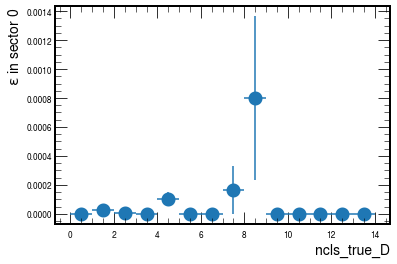

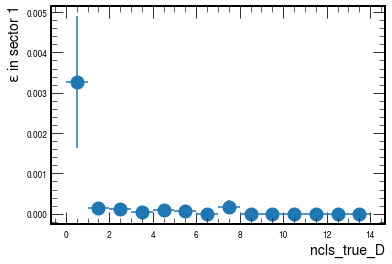

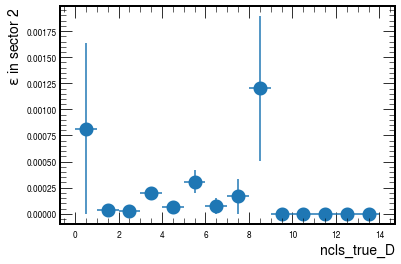

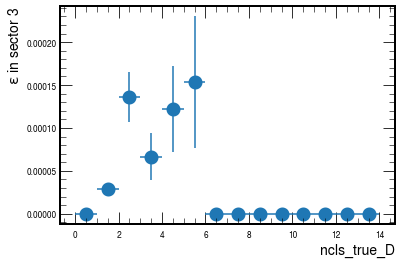

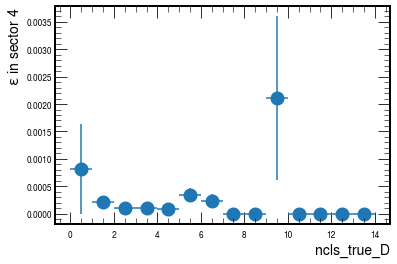

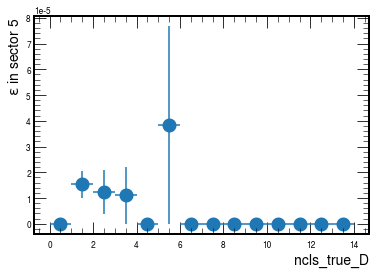

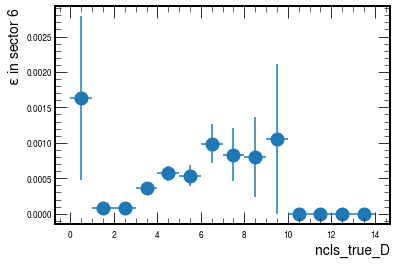

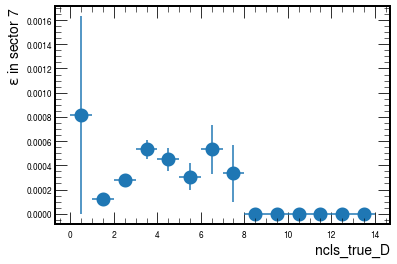

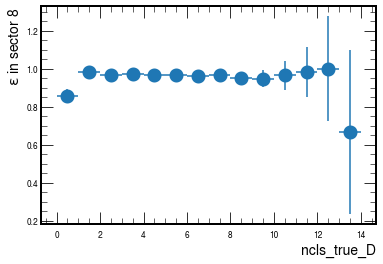

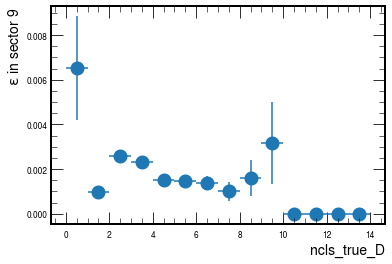

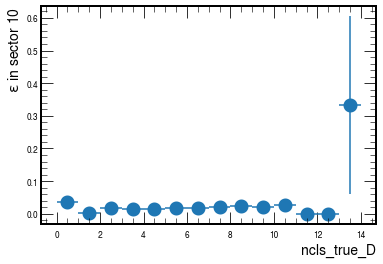

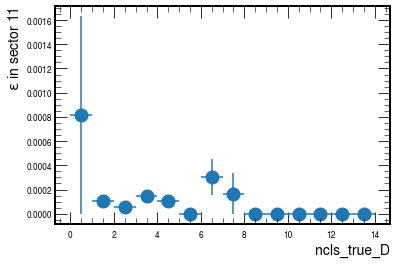

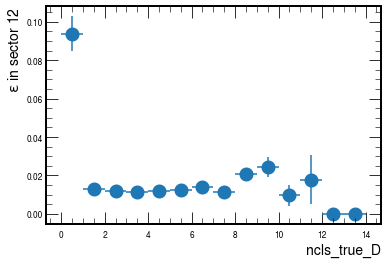

In [65]:

eps_prob4(dfmatched_sc, 'ncls_true_D' ,14,14)


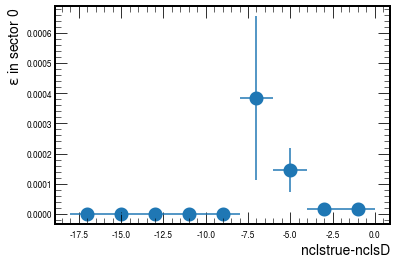

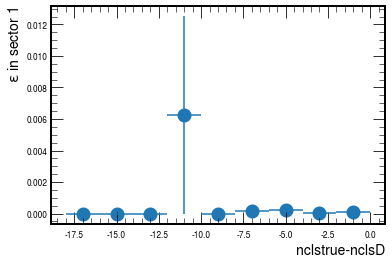

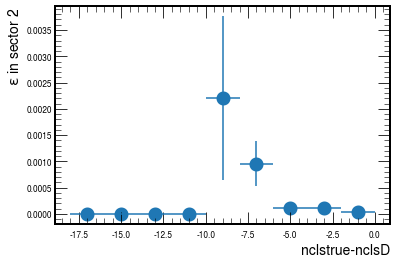

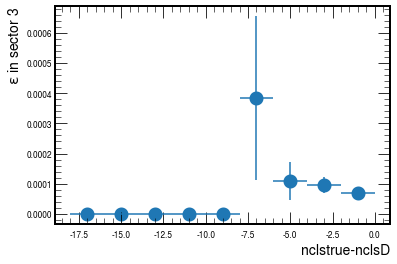

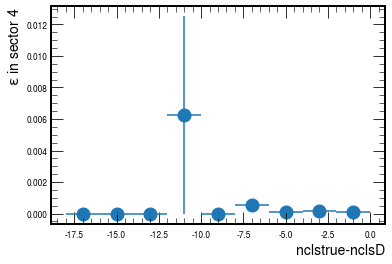

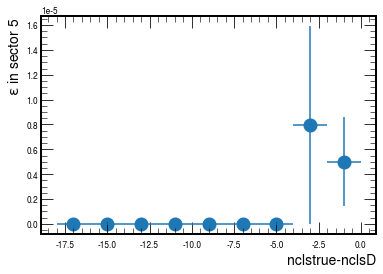

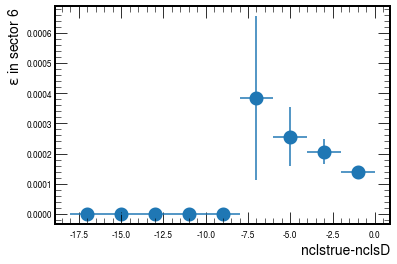

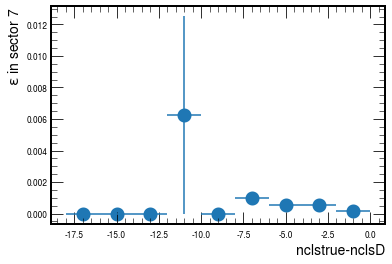

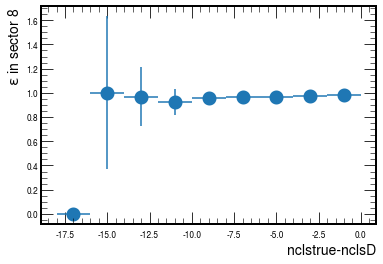

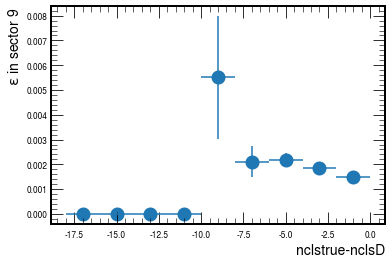

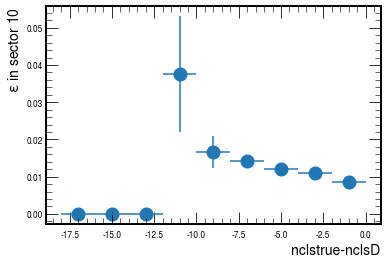

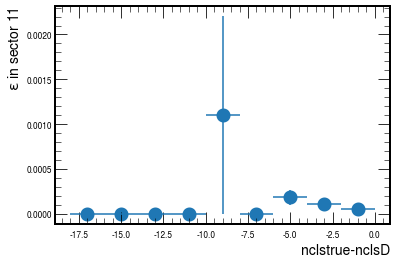

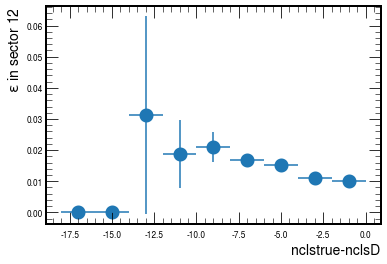

In [64]:
def eps_prob(df, num_intervalli,x):
    larghezza_intervallo = x / num_intervalli
    intervalli_eta = [(i * larghezza_intervallo, (i + 1) * larghezza_intervallo) for i in range(num_intervalli)]
    dfdiff= df.ncls_true_D-df.ncls_tot_D
    for i in range(13):
        eps_values = []
        yerr=[]
        for lower, upper in intervalli_eta:
            mask = (dfdiff >= upper) & (dfdiff < lower)
            df_e = dfdiff[mask]
            n1=len(df_e[sector[i]])
            ntot=len(df_e)
            if ntot==0: ntot=1
            eps = n1/ntot
            eps_values.append(eps)
            yerr+=[np.sqrt(n1+n1**2/ntot)/ntot]

        x_values = [lower + larghezza_intervallo / 2 for lower, _ in intervalli_eta]

        plt.errorbar(x_values, eps_values,yerr=yerr, xerr=abs(np.ones(num_intervalli) * larghezza_intervallo / 2), fmt='none')
        plt.scatter(x_values, eps_values, linewidths=8)

        plt.ylabel('$\epsilon$ in sector ' + str(i), fontsize=14)
        plt.xlabel('nclstrue-nclsD', fontsize=14)
        filename = f'eps_sector_{i}_intervallo_{num_intervalli}.png'
        plt.savefig(filename)
        plt.show()

eps_prob(dfmatched_sc ,9,-18)


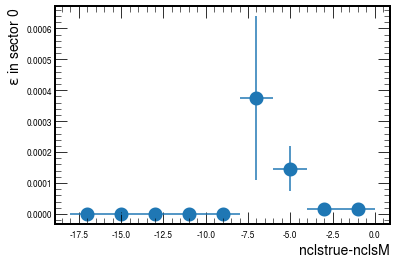

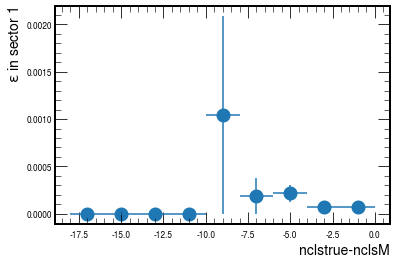

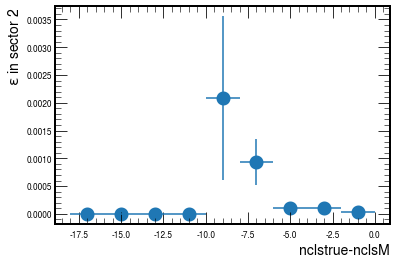

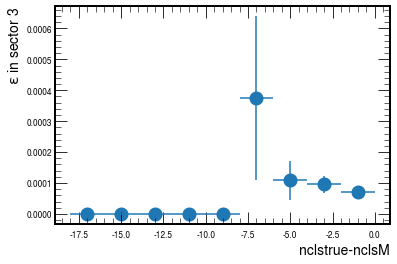

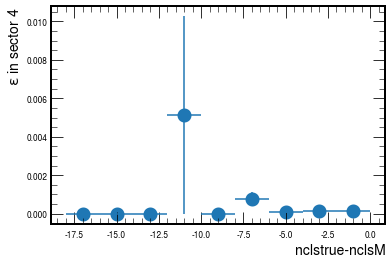

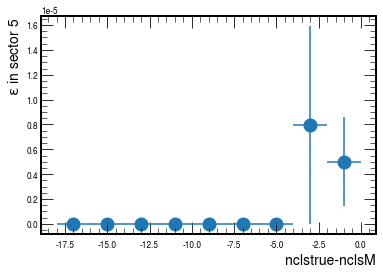

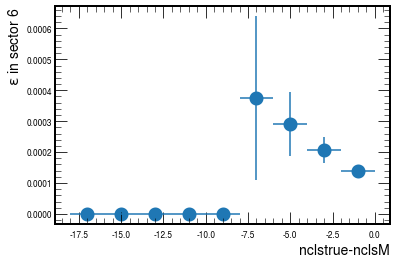

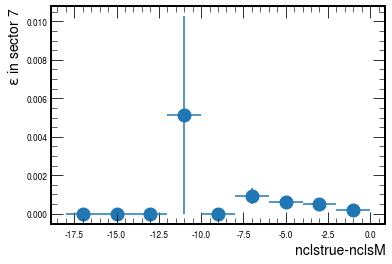

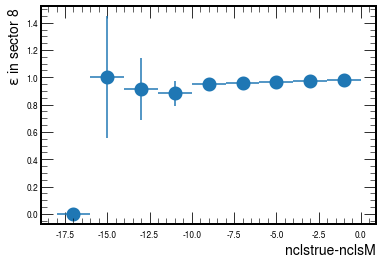

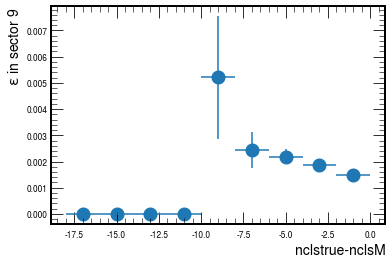

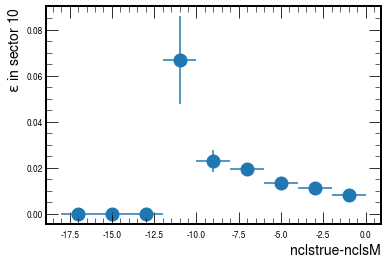

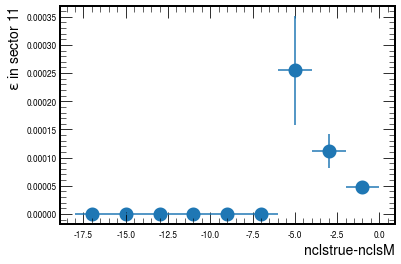

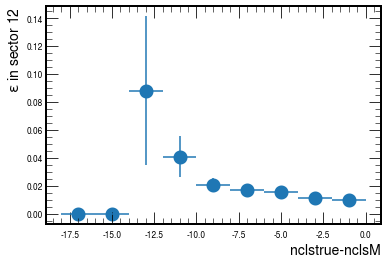

In [67]:
def eps_prob(df, num_intervalli,x):
    larghezza_intervallo = x / num_intervalli
    intervalli_eta = [(i * larghezza_intervallo, (i + 1) * larghezza_intervallo) for i in range(num_intervalli)]
    dfdiff= df.ncls_true_M-df.ncls_tot_M
    for i in range(13):
        eps_values = []
        yerr=[]
        for lower, upper in intervalli_eta:
            mask = (dfdiff >= upper) & (dfdiff < lower)
            df_e = dfdiff[mask]
            n1=len(df_e[sector[i]])
            ntot=len(df_e)
            if ntot==0: ntot=1
            eps = n1/ntot
            eps_values.append(eps)
            yerr+=[np.sqrt(n1+n1**2/ntot)/ntot]

        x_values = [lower + larghezza_intervallo / 2 for lower, _ in intervalli_eta]

        plt.errorbar(x_values, eps_values,yerr=yerr, xerr=abs(np.ones(num_intervalli) * larghezza_intervallo / 2), fmt='none')
        plt.scatter(x_values, eps_values, linewidths=8)

        plt.ylabel('$\epsilon$ in sector ' + str(i), fontsize=14)
        plt.xlabel('nclstrue-nclsM', fontsize=14)
        filename = f'eps_sector_{i}_intervallo_{num_intervalli}.png'
        plt.savefig(filename)
        plt.show()

eps_prob(dfmatched_sc ,9,-18)


# Settore 6

Domanda: settore 6: 
- quando   |DD| >|DM| nella zona a eta 1.5, com’e’ la distribuzione del number di clusters
- 2D plot: NclsM vs Ncls D  only in region 6 eta [1,1,8]
- Ncls Refined vs NclsDe refined
- Energy D vs M,   energia refined D vs M
Lo stesso nel settore 2


In [17]:
maskD=(dfmatched_sc.seed_eta_D>1)&(dfmatched_sc.seed_eta_D<1.8)
maskM=(dfmatched_sc.seed_eta_M>1)&(dfmatched_sc.seed_eta_M<1.8)


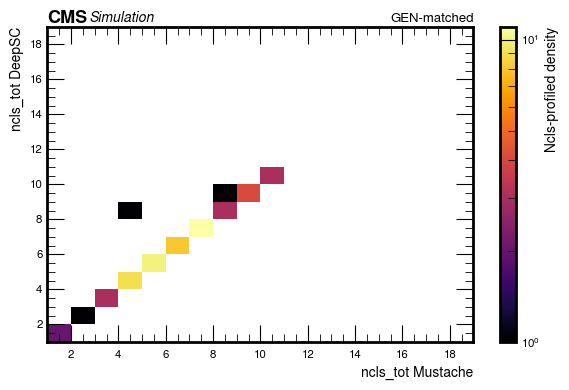

In [18]:
dfmatched_sc6=dfmatched_sc[sector[6]]
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc6.ncls_tot_M[maskD], 
                                  dfmatched_sc6.ncls_tot_D[maskD], bins=(xbins, ybins ))

s = 1#np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("ncls_tot DeepSC")
ax.set_xlabel("ncls_tot Mustache")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()

In [19]:
DM_=dfmatched_sc.ele_nclsRefinedSC_M-dfmatched_sc.ele_nclsEcalSC_M
DD_=dfmatched_sc.ele_nclsRefinedSC_D-dfmatched_sc.ele_nclsEcalSC_D

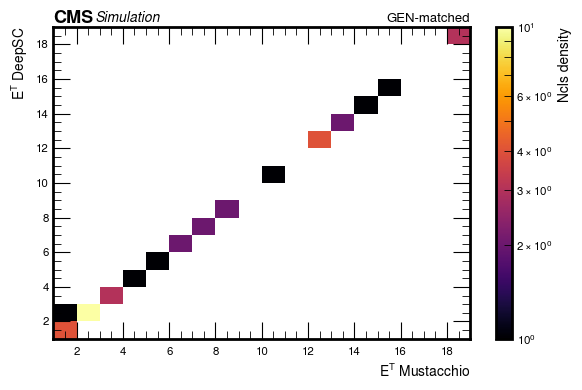

In [20]:
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc6.et_seed_M[maskD], 
                                  dfmatched_sc6.et_seed_D[maskD], bins=(xbins, ybins ))

s = 1#np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls density")
ax.set_ylabel("$E^T$ DeepSC")
ax.set_xlabel("$E^T$ Mustacchio")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()

# sector 2

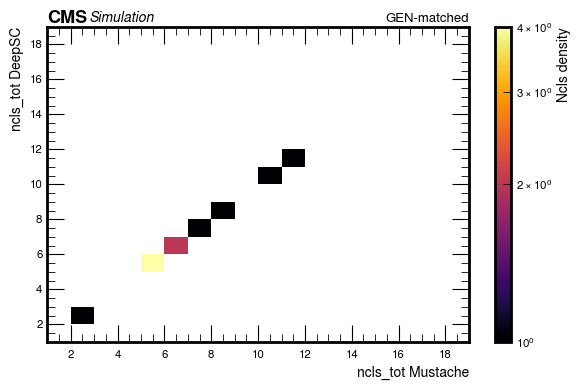

In [21]:
dfmatched_sc2=dfmatched_sc[sector[2]]
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc2.ncls_tot_M[maskD], 
                                  dfmatched_sc2.ncls_tot_D[maskD], bins=(xbins, ybins ))

s = 1#np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls density")
ax.set_ylabel("ncls_tot DeepSC")
ax.set_xlabel("ncls_tot Mustache")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()

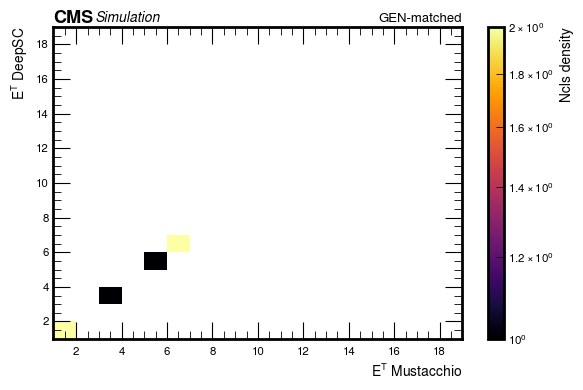

In [22]:
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(dfmatched_sc2.et_seed_M[maskD], 
                                  dfmatched_sc2.et_seed_D[maskD], bins=(xbins, ybins ))

s =1# np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls density")
ax.set_ylabel("$E^T$ DeepSC")
ax.set_xlabel("$E^T$ Mustacchio")
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()

# Number of clustar ==1

In [84]:
mask1=(dfmatched_sc.ncls_true_D==1)&(dfmatched_sc.ncls_true_M==1)
df1=dfmatched_sc[mask1]

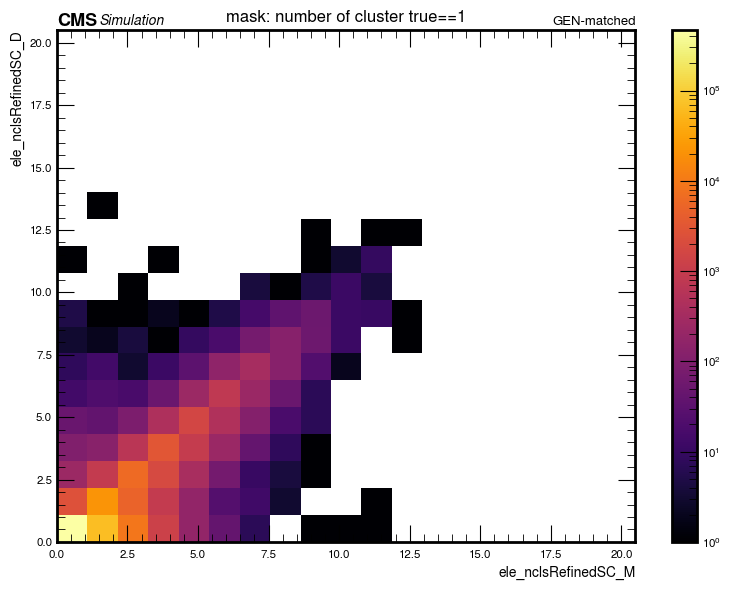

In [89]:
#ele_nclsRefinedSC
fig, ax = plt.subplots(1,1,dpi=100,figsize=(8,6))
A,xedges,yedges  = np.histogram2d(df1.ele_nclsRefinedSC_M, 
                                  df1.ele_nclsRefinedSC_D, bins=(xbins,xbins ))

s =1# np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax)
ax.set_ylabel("ele_nclsRefinedSC_D")
ax.set_xlabel("ele_nclsRefinedSC_M")
plt.title('mask: number of cluster true==1')

ax.tick_params(axis='both', which='major', labelsize=14)
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig('Plot1/nclsref_D_M_masktrue1.pdf')

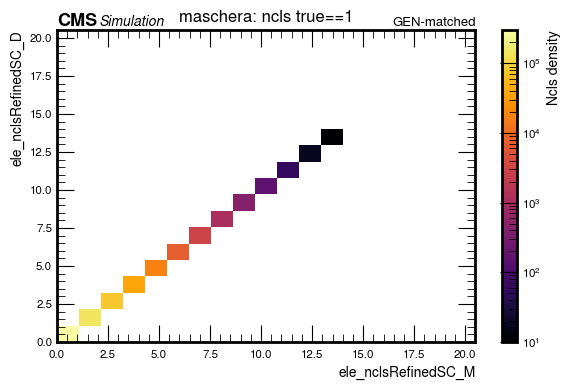

In [91]:
#ele_nclsRefinedSC
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(df1.ncls_tot_M, 
                                  df1.ncls_tot_D, bins=(xbins, xbins ))

s =1# np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls density")
ax.set_ylabel("ele_nclsRefinedSC_D")
ax.set_xlabel("ele_nclsRefinedSC_M")
plt.title('maschera: ncls true==1')
plt.savefig('ref_D_M_mask1.png')
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()


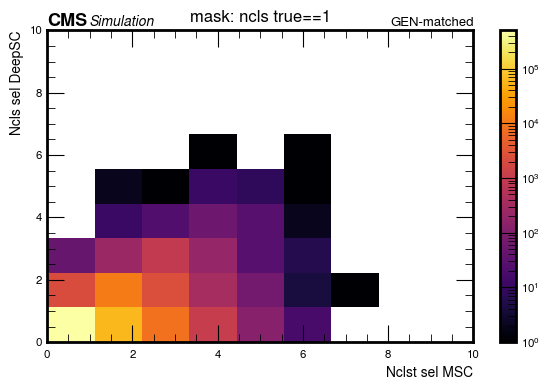

In [100]:
xbins=np.linspace(0,10,10)
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(df1.ncls_sel_M, 
                                  df1.ncls_sel_D, bins=(xbins, xbins ))

s =1# np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax)
ax.set_ylabel("Ncls sel DeepSC")
ax.set_xlabel("Nclst sel MSC")
plt.title('mask: ncls true==1')
plt.savefig('Plot1/nclsel_D_M_mask1.pdf')
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()

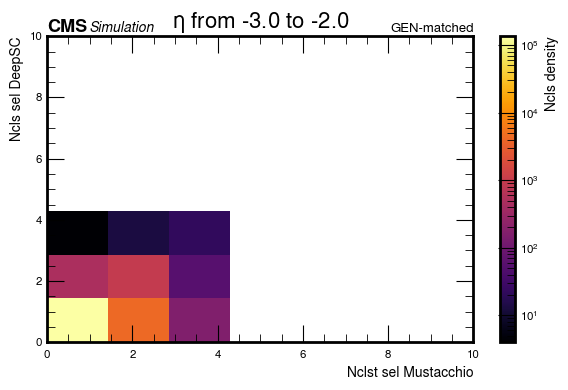

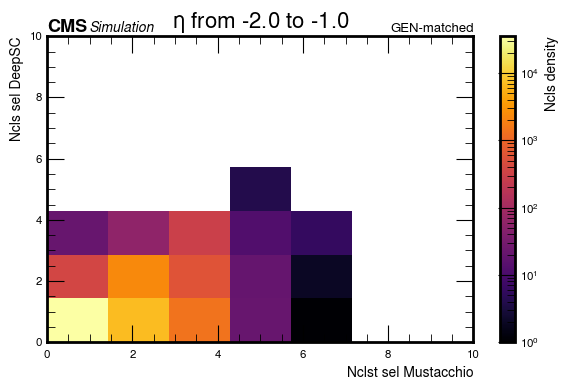

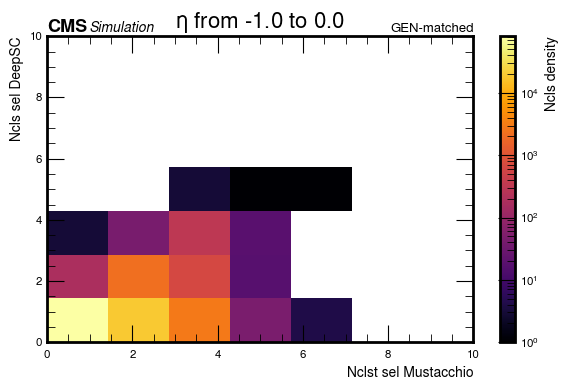

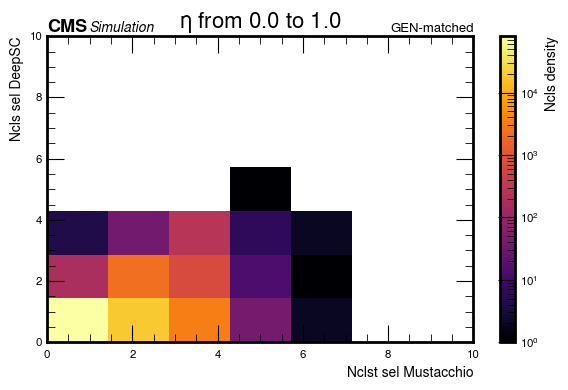

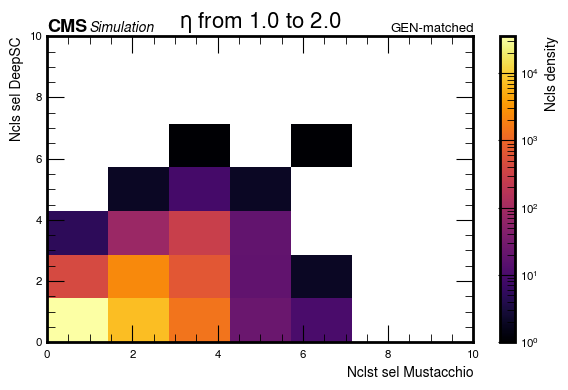

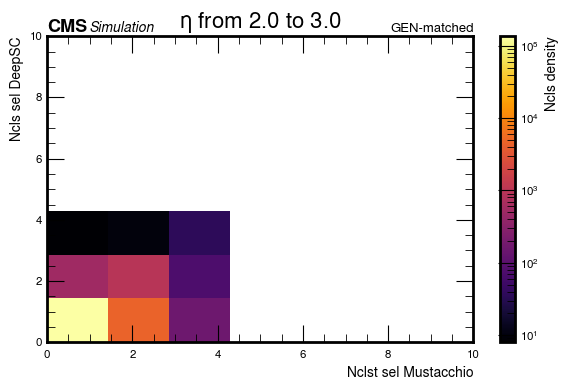

In [119]:


def ncl1_eta(df, colonna, num_intervalli,x):
    larghezza_intervallo = x / num_intervalli
    intervalli_eta = [(i * larghezza_intervallo-3, (i + 1) * larghezza_intervallo-3) for i in range(num_intervalli)]
    for lower, upper in intervalli_eta:
        l=round(lower,2)
        u=round(upper,2)
        mask = (df[colonna] < upper) & (df[colonna] >= lower)
        df_e = df[mask]
        
        fig, ax = plt.subplots(1,1,dpi=100)
        A,xedges,yedges  = np.histogram2d(df_e.ncls_sel_M, 
                                          df_e.ncls_sel_D, bins=(xbins, xbins ))
        
        s =1# np.expand_dims(np.sum(A, axis=-1), axis=1)
        a = A/s
        X, Y = np.meshgrid(xedges, yedges)
        I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
        fig.colorbar(I, ax=ax, label="Ncls density")
        ax.set_ylabel("Ncls sel DeepSC")
        ax.set_xlabel("Nclst sel Mustacchio")
        plt.title('$\eta$ from '+ str(l) +' to '+str(u),fontsize=16)
        filename = f'Plot1/nclsel_eta_{l}_{u}.pdf'
        plt.savefig(filename)
        hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
        plt.tight_layout()


ncl1_eta(df1, 'seed_eta_M' ,6,6)


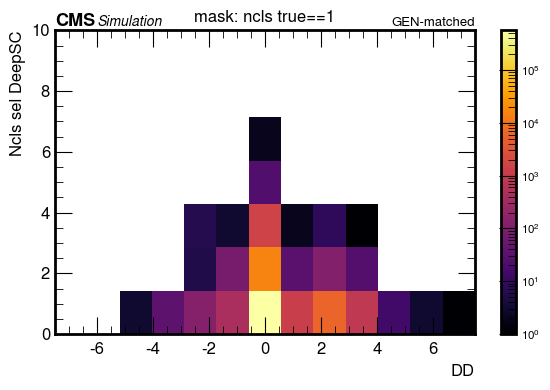

In [125]:
xbins=np.linspace(0,10,8)
bins=np.linspace(-7.5,7.5,14)
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(DD[mask1], 
                                  df1.ncls_sel_D, bins=(bins,xbins ))

s =1# np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax)
ax.set_ylabel("Ncls sel DeepSC",fontsize=12)
ax.set_xlabel("DD",fontsize=12)
plt.title('mask: ncls true==1')

ax.tick_params(axis='both', which='major', labelsize=12)
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig('Plot1/DD_nclssel_mask1.pdf')

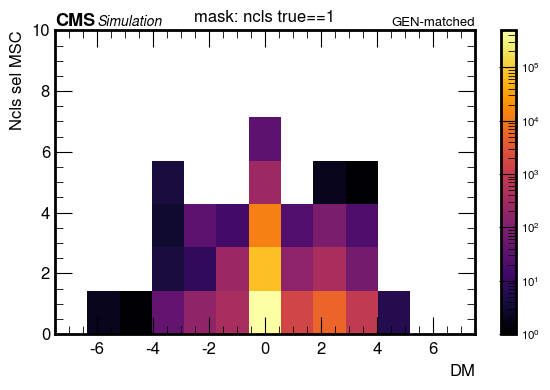

In [126]:
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(DM[mask1], 
                                  df1.ncls_sel_M, bins=(bins, xbins ))

s =1# np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax)
ax.set_ylabel("Ncls sel MSC",fontsize=12)
ax.set_xlabel("DM",fontsize=12)
plt.title('mask: ncls true==1')

ax.tick_params(axis='both', which='major', labelsize=12)
hep.cms.label(llabel="Simulation", rlabel="GEN-matched", loc=0, ax=ax)
plt.tight_layout()
plt.savefig('Plot1/DM_nclssel_mask1.pdf')

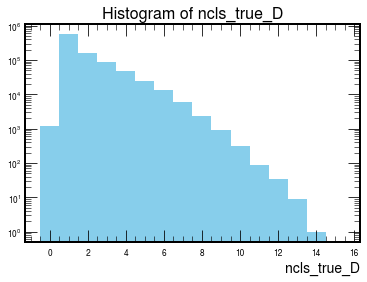

In [30]:
plt.hist(dfmatched_sc.ncls_true_D, bins=16, range=(-0.5,15.5), color='skyblue')
plt.yscale('log')
plt.xlabel('ncls_true_D', fontsize=14)
plt.title('Histogram of ncls_true_D', fontsize=16)
plt.savefig('clstruedistribution.png')
plt.show()

In [31]:
strange_events = dfmatched_sc[dfmatched_sc.ncls_true_D==0]

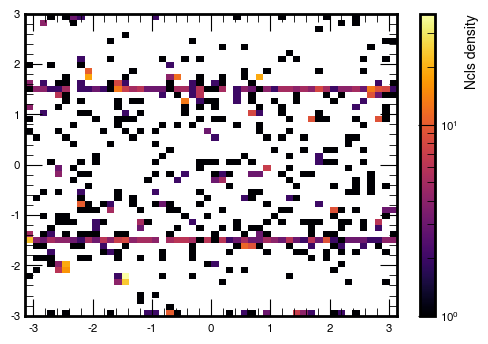

In [32]:
ybins=np.linspace(0,3,10)
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(strange_events.genpart_phi_D, 
                                  strange_events.genpart_eta_D, bins=(50,50), 
                                 range=((-3.14, 3.14),(-3,3)))

s =1# np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls density")

# Comparison sc-ele matched

In [11]:
sc_matched = (dfj.sc_matched_D==1)&(dfj.sc_matched_M==1)
ele_matched = (dfj.elematched_D==1)&(dfj.elematched_M==1)
dfmatched_ele = dfj[ele_matched]
sc_notele=dfj[sc_matched& ~(ele_matched)]
notsc_ele=dfj[(~sc_matched)& (ele_matched)]

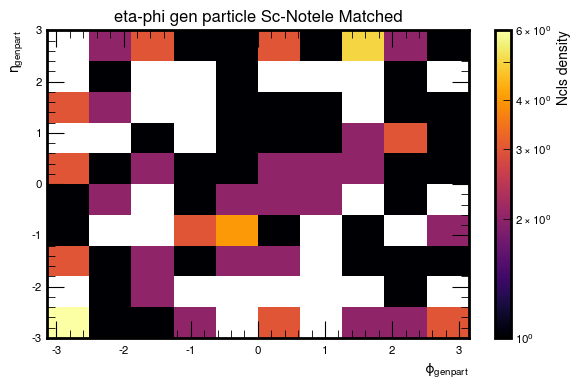

In [52]:

fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(sc_notele.genpart_phi_D,sc_notele.genpart_eta_D,   range=((-np.pi,np.pi),(-3,3)))
a = A
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")
fig.colorbar(I, ax=ax, label="Ncls density")
ax.set_ylabel("$\eta_{genpart}$")
ax.set_xlabel("$\phi_{genpart}$")
plt.title('eta-phi gen particle Sc-Notele Matched')
plt.savefig('eta_phi_sc_notelematched.png')
plt.tight_layout()

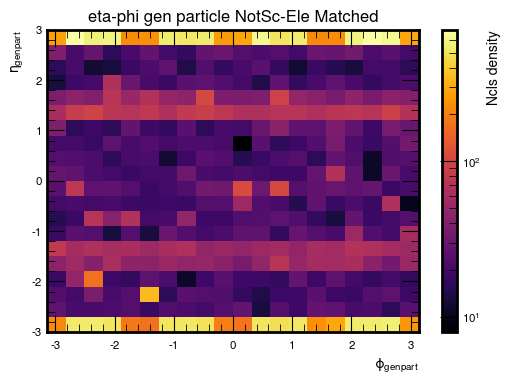

In [53]:
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(notsc_ele.genpart_phi_D,notsc_ele.genpart_eta_D, bins=((20,20)),  range=((-np.pi,np.pi),(-3,3)))
a = A
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls density")
ax.set_ylabel("$\eta_{genpart}$")
ax.set_xlabel("$\phi_{genpart}$")
plt.title('eta-phi gen particle NotSc-Ele Matched')
plt.savefig('eta_phi_notsc_elematched.png')

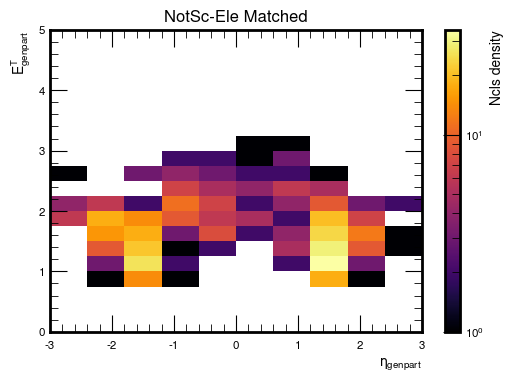

In [54]:
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(notsc_ele.genpart_eta_D,notsc_ele.et_seed_D,  bins=((10,20)),range=((-3,3),(0,5)))
a = A
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls density")
ax.set_ylabel("$E^T_{genpart}$")
ax.set_xlabel("$\eta_{genpart}$")
plt.title('NotSc-Ele Matched')
plt.savefig('et_notsc_elematched.png')

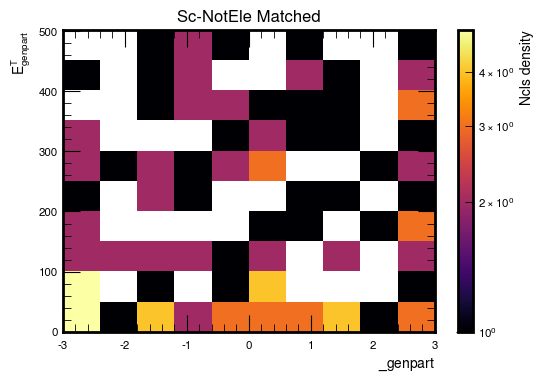

In [58]:
fig, ax = plt.subplots(1,1,dpi=100)
A,xedges,yedges  = np.histogram2d(sc_notele.genpart_eta_D,sc_notele.et_seed_D,  bins=((10,10)),range=((-3,3),(0,502)))
a = A
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=LogNorm(), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls density")
ax.set_ylabel("$E^T_{genpart}$")
ax.set_xlabel("$\_{genpart}$")
plt.title('Sc-NotEle Matched')
plt.savefig('et_sc_notelematched.png')

In [48]:
max(notsc_ele.et_seed_D)

3.233851283939418